# PyCalcolAr
### Inizializzazione

In [134]:
# Importare le librerie utili per la creazione del codice
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
pd.set_option('display.max_columns', None)

# Variabile utilizzata nel calcolo, DA MODIFICARE MANUALMENTE DALL'UTENTE  
delay = 246

### Importazione files
### > file Triplo36 (file di calibrazione dell'aria)

In [135]:
# definire il percorso del file (DA MODIFICARE MANUALMENTE DALL'UTENTE)
#file_path = "../test_data/doppio2013_2015.txt"

# definire la lista con gli indici delle colonne 
#columns_names=['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0' \
 #              ,'40F/36F', 'err 40F/36F','gain IC0/IC1', 'err gain IC0/IC1', '40F/36IC0', 'err 40F/36IC0', 'Run', 'Path']

# definire le colonne che contengono dati numerici (ad eccezione delle colonne 'Run' e 'Path')
#columns_numeric=['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0' \
#                 ,'40F/36F', 'err 40F/36F','gain IC0/IC1', 'err gain IC0/IC1', '40F/36IC0', 'err 40F/36IC0']

# importare il file utilizzando caratteri separatori (sep = '\t|,') '\t' = tab, ',' = virgola
#airpipette_data = pd.read_csv(file_path, header = None, names = columns_names, sep = '\t|,', engine = 'python')

# eliminare i caratteri "{}" dalle colonne relative all'errore
#airpipette_data = airpipette_data.replace(["{","}"], ["",""], regex=True)

# convertire tutte le colonne del dataframe a numeric (float64)
#for i in columns_numeric:
#    airpipette_data[i] = pd.to_numeric(airpipette_data[i])
    
# definire un dataframe con le "colonne utili" (foglio airpipette_data)
#airpipette_data = airpipette_data[['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0', \
#                                  '36F', 'err 36F', '40F/36F', 'err 40F/36F', 'Run', 'Path']]

# stampare il dataframe 'airpipette_data'
#print("Air pipette initial imported data:")

# dividere la colonna 'Run' in due colonne: nome del run e data/ora
#run_split = airpipette_data['Run'].str.split(" run on ")

# formattare la colonna con il nome del run (del campione) in una serie pandas e associarle un nome 
#run_name = run_split.str[0]
#run_name = run_name.replace(["'"], [""], regex=True)
#run_name.name = 'Run_Name'

# formattare la colonna con il numero del run 
#run_number = airpipette_data['Path'].str.split('.').str[0]
#run_number = run_number.str.split('_').str[-1]
#run_number.name= 'Run_Number'
#run_number = pd.to_numeric(run_number)

# formattare la colonna con la data e l'ora in una serie pandas e associarle un nome, convertire il dato in datetime64
#dataora = run_split.str[1]
#dataora.name = 'Date_Time'
#dataora = pd.to_datetime(dataora)

# concatenare le nuove colonne all'inizio del dataframe airpipette_data
#airpipette_data = pd.concat([run_name, run_number, dataora, airpipette_data], axis = 1)

# eliminare la colonna 'Run' (non più utilizzata)
#airpipette_data.drop('Run',axis=1, inplace=True)


# conversione valore da count a V per tutti IC0,IC1 e relativi errori... (n / 62415000)
#airpipette_data.loc[:,'38IC0'] = airpipette_data.loc[:,'38IC0'].values / 62415000
#airpipette_data.loc[:,'err 38IC0'] = airpipette_data.loc[:,'err 38IC0'].values / 62415000
#airpipette_data.loc[:,'36IC1'] = airpipette_data.loc[:,'36IC1'].values / 62415000
#airpipette_data.loc[:,'err 36IC1'] = airpipette_data.loc[:,'err 36IC1'].values / 62415000
#airpipette_data.loc[:,'36IC0'] = airpipette_data.loc[:,'36IC0'].values / 62415000
#airpipette_data.loc[:,'err 36IC0'] = airpipette_data.loc[:,'err 36IC0'].values / 62415000
#airpipette_data.loc[:,'40F'] = airpipette_data.loc[:,'40F'].values / 62415000
#airpipette_data.loc[:,'err 40F'] = airpipette_data.loc[:,'err 40F'].values / 62415000

#display(airpipette_data)

In [255]:
# definire il percorso del file (DA MODIFICARE MANUALMENTE DALL'UTENTE)
file_path = "../test_data/doppio2013_2014.txt"

# definire la lista con gli indici delle colonne 
columns_names=['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0', \
               '40F/36F', 'err 40F/36F','gain IC0/IC1', 'err gain IC0/IC1', 'Run', 'Path']

# definire le colonne che contengono dati numerici (ad eccezione delle colonne 'Run' e 'Path')
columns_numeric=['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0', \
                 '40F/36F', 'err 40F/36F','gain IC0/IC1', 'err gain IC0/IC1']

# importare il file utilizzando caratteri separatori (sep = '\t|,') '\t' = tab, ',' = virgola
airpipette_data = pd.read_csv(file_path, header = None, names = columns_names, sep = '\t|,', engine = 'python')

# eliminare i caratteri "{}" dalle colonne relative all'errore
airpipette_data = airpipette_data.replace(["{","}"], ["",""], regex=True)

# convertire tutte le colonne del dataframe a numeric (float64)
for i in columns_numeric:
    airpipette_data[i] = pd.to_numeric(airpipette_data[i])
    
# definire un dataframe con le "colonne utili" (foglio airpipette_data)
airpipette_data = airpipette_data[['40F', 'err 40F', '38IC0', 'err 38IC0', '36IC1', 'err 36IC1', '36IC0', 'err 36IC0' \
                                   ,'gain IC0/IC1', 'err gain IC0/IC1','40F/36F', 'err 40F/36F', 'Run', 'Path']]
                                   
                               
# stampare il dataframe 'airpipette_data'
print("Air pipette initial imported data:")

# dividere la colonna 'Run' in due colonne: nome del run e data/ora
run_split = airpipette_data['Run'].str.split(" run on ")

# formattare la colonna con il nome del run (del campione) in una serie pandas e associarle un nome 
run_name = run_split.str[0]
run_name = run_name.replace(["'"], [""], regex=True)
run_name.name = 'Run_Name'

# formattare la colonna con il numero del run 
run_number = airpipette_data['Path'].str.split('.').str[0]
run_number = run_number.str.split('_').str[-1]
run_number.name= 'Run_Number'
run_number = pd.to_numeric(run_number)

# formattare la colonna con la data e l'ora in una serie pandas e associarle un nome, convertire il dato in datetime64
dataora = run_split.str[1]
dataora.name = 'Date_Time'
dataora = pd.to_datetime(dataora)

# concatenare le nuove colonne all'inizio del dataframe airpipette_data
airpipette_data = pd.concat([run_name, run_number, dataora, airpipette_data], axis = 1)

# eliminare la colonna 'Run' (non più utilizzata)
airpipette_data.drop('Run',axis=1, inplace=True)


# conversione valore da count a V per tutti IC0,IC1 e relativi errori... (n / 62415000)
airpipette_data.loc[:,'38IC0'] = airpipette_data.loc[:,'38IC0'].values / 62415000
airpipette_data.loc[:,'err 38IC0'] = airpipette_data.loc[:,'err 38IC0'].values / 62415000
airpipette_data.loc[:,'36IC1'] = airpipette_data.loc[:,'36IC1'].values / 62415000
airpipette_data.loc[:,'err 36IC1'] = airpipette_data.loc[:,'err 36IC1'].values / 62415000
airpipette_data.loc[:,'36IC0'] = airpipette_data.loc[:,'36IC0'].values / 62415000
airpipette_data.loc[:,'err 36IC0'] = airpipette_data.loc[:,'err 36IC0'].values / 62415000
airpipette_data.loc[:,'40F'] = airpipette_data.loc[:,'40F'].values / 62415000
airpipette_data.loc[:,'err 40F'] = airpipette_data.loc[:,'err 40F'].values / 62415000

display(airpipette_data)

Air pipette initial imported data:


,Run_Name,Run_Number,Date_Time,40F,err 40F,38IC0,err 38IC0,36IC1,err 36IC1,36IC0,err 36IC0,gain IC0/IC1,err gain IC0/IC1,40F/36F,err 40F/36F,Path
0,same gas,1012,2013-01-22 16:16:00,0.131771,0.000272,0.000090,6.408716e-07,0.000386,1.762397e-06,0.000379,2.082833e-06,0.982163,0.0073,341.405,1.80,Raw data stored in - C:\Nu Noble\Results\Data...
1,Sample Name,1055,2013-04-15 14:53:00,0.119544,0.000561,0.000083,8.811984e-07,0.000394,2.082833e-06,0.000406,2.563486e-06,1.030210,0.0084,303.496,2.10,Raw data stored in - C:\Nu Noble\Results\Data...
2,Sample Name,1056,2013-04-15 14:57:00,0.111558,0.000304,0.000076,7.370023e-07,0.000366,1.249700e-06,0.000374,1.185612e-06,1.021480,0.0047,304.406,1.30,Raw data stored in - C:\Nu Noble\Results\Data...
3,Sample Name,1057,2013-04-15 15:01:00,0.106455,0.000288,0.000070,7.049587e-07,0.000350,1.281743e-06,0.000342,8.811984e-07,0.977139,0.0044,304.476,1.40,Raw data stored in - C:\Nu Noble\Results\Data...
4,Sample Name,1058,2013-04-15 15:05:00,0.102044,0.000288,0.000068,5.447408e-07,0.000338,1.185612e-06,0.000337,1.249700e-06,0.996712,0.0051,301.762,1.40,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Sample Name,1877,2014-07-17 12:03:00,0.107239,0.000034,0.000066,3.685012e-07,0.000310,1.025395e-06,0.000351,9.933510e-07,1.132000,0.0049,345.737,1.20,Raw data stored in - C:\Nu Noble\Results\Data...
87,Sample Name,1878,2014-07-17 12:12:00,0.107154,0.000029,0.000065,4.165665e-07,0.000322,9.452856e-07,0.000351,9.452856e-07,1.090690,0.0044,332.735,0.99,Raw data stored in - C:\Nu Noble\Results\Data...
88,Sample Name,1879,2014-07-17 12:19:00,0.099758,0.000029,0.000062,3.204358e-07,0.000303,6.889370e-07,0.000326,6.729152e-07,1.076250,0.0033,328.895,0.75,Raw data stored in - C:\Nu Noble\Results\Data...
89,Sample Name,1880,2014-07-17 14:54:00,0.105349,0.000035,0.000065,3.204358e-07,0.000311,1.041416e-06,0.000346,7.049587e-07,1.115330,0.0044,339.243,1.10,Raw data stored in - C:\Nu Noble\Results\Data...


### > file Run4 e Run22 (file di misura)

In [256]:
# definire la lista con gli indici delle colonne 
column_names_run3 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1', '39Ar F', 'err39Ar F', \
                     '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', '39Ar IC0',  'err39Ar IC0',  '37Ar IC1', \
                     'err37Ar IC1', 'gainF/IC0', 'err gainF/IC0' , 'gainIC0/IC1', 'err gainIC0/IC1', '40/36', \
                     'err40/36', 'Run', 'Path']
column_names_run2 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1', '39Ar F', 'err39Ar F', \
                     '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', 'gainIC0/IC1', 'err gainIC0/IC1', 'Run', 'Path']

# definire il percorso dei file (DA MODIFICARE MANUALMENTE DALL'UTENTE)
file_path_3 = "../test_data/run3_senza indici.txt"
file_path_2 = "../test_data/run2_senza indici.txt"

# importare i file run
df_data_3 = pd.read_csv(file_path_3, header = None, index_col= False, names = column_names_run3, \
                        sep = '\t|,', engine = 'python')
df_data_2 = pd.read_csv(file_path_2, header = None, index_col= False, names = column_names_run2, \
                         sep = '\t|,', engine = 'python')

# eliminare i caratteri "{}" dalle colonne
df_data_3 = df_data_3.replace(["{", "}"], ["", ""], regex=True)
df_data_2 = df_data_2.replace(["{", "}"], ["", ""], regex=True)

# definire le colonne che contengono dati numerici
colnames_numeric_3 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1', '39Ar F', 'err39Ar F', \
                      '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', '39Ar IC0',  'err39Ar IC0',  '37Ar IC1', \
                      'err37Ar IC1', 'gainF/IC0', 'err gainF/IC0' , 'gainIC0/IC1', 'err gainIC0/IC1', '40/36', \
                      'err40/36']   
colnames_numeric_2 = ['40Ar F', 'err40Ar F', '38Ar IC0', 'err38Ar IC0', '36Ar IC1', 'err36Ar IC1', '39Ar F', 'err39Ar F', \
                     '37Ar IC0', 'err37Ar IC0' , '35Cl IC1', 'err35Cl IC1', 'gainIC0/IC1', 'err gainIC0/IC1']

# convertire tutte le colonne del dataframe df_data_4 a numeric (float64)
for i in colnames_numeric_3:
    df_data_3[i] = pd.to_numeric(df_data_3[i])

# convertire tutte le colonne del dataframe df_data_22 a numeric (float64)
for i in colnames_numeric_2:
    df_data_2[i] = pd.to_numeric(df_data_2[i])

df_data = pd.concat([df_data_3, df_data_2], axis=0)

display(df_data)

,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,39Ar F,err39Ar F,37Ar IC0,err37Ar IC0,35Cl IC1,err35Cl IC1,39Ar IC0,err39Ar IC0,37Ar IC1,err37Ar IC1,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40/36,err40/36,Run,Path
0,0.213,0.00011,0.000146,3.300000e-07,0.000681,5.600000e-07,-0.000186,0.000095,0.000027,1.800000e-07,-5.490000e-08,5.300000e-09,0.000019,1.000000e-07,0.000014,1.000000e-07,-0.1030,0.053,0.533,0.0052,313.0,0.30,'Sample Name' run on 24 April 2013 at 12:40,Raw data stored in - C:\Nu Noble\Results\Data...
1,1.230,0.00790,0.000826,6.200000e-06,0.004240,2.700000e-05,0.000224,0.000089,0.000040,5.000000e-07,-9.370000e-08,9.500000e-09,0.000192,1.300000e-06,0.000015,1.600000e-07,0.8600,0.340,0.375,0.0062,290.0,2.60,'Sample Name' run on 24 April 2013 at 12:57,Raw data stored in - C:\Nu Noble\Results\Data...
2,0.495,0.00360,0.000360,2.700000e-06,0.001700,1.100000e-05,0.000554,0.000083,0.000041,3.000000e-07,-1.100000e-07,1.200000e-08,0.000617,6.400000e-06,0.000017,1.300000e-07,1.1100,0.170,0.412,0.0043,291.0,2.90,'Sample Name' run on 24 April 2013 at 13:29,Raw data stored in - C:\Nu Noble\Results\Data...
3,0.315,0.00270,0.000294,2.700000e-06,0.001010,8.000000e-06,0.003680,0.000079,0.000048,2.900000e-07,-3.260000e-08,7.900000e-09,0.004150,3.600000e-05,0.000022,1.200000e-07,1.1300,0.026,0.454,0.0038,311.0,3.60,'Sample Name' run on 24 April 2013 at 13:47,Raw data stored in - C:\Nu Noble\Results\Data...
4,1.060,0.00075,0.000710,1.000000e-06,0.003440,2.900000e-06,0.000171,0.000049,0.000030,5.700000e-07,-6.430000e-08,6.400000e-09,0.000017,2.100000e-07,0.000013,8.500000e-08,0.0979,0.028,0.433,0.0087,309.0,0.34,'MMhb-alfa stp1' run on 14 May 2013 at 14:44,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.318,0.00024,0.000999,1.300000e-06,0.000915,2.300000e-06,0.030300,0.000033,0.000006,1.000000e-07,1.500000e-05,1.600000e-07,NaN,NaN,NaN,NaN,NaN,NaN,347.000,0.9200,NaN,NaN,'alunite L1 st2' run on 26 November 2014 at 16:42,Raw data stored in - C:\Nu Noble\Results\Data...
148,0.242,0.00017,0.000698,9.800000e-07,0.000703,1.700000e-06,0.020500,0.000029,0.000006,1.000000e-07,1.530000e-05,1.400000e-07,NaN,NaN,NaN,NaN,NaN,NaN,345.000,0.8600,NaN,NaN,'alunite l1 stp3' run on 26 November 2014 at 1...,Raw data stored in - C:\Nu Noble\Results\Data...
149,0.375,0.00012,0.000577,4.200000e-07,0.000364,4.000000e-07,0.027600,0.000017,0.000013,5.400000e-08,1.260000e-05,5.900000e-08,NaN,NaN,NaN,NaN,NaN,NaN,1030.000,1.2000,NaN,NaN,'FZ53B1-2 STEP7' run on 14 January 2015 at 13:14,Raw data stored in - C:\Nu Noble\Results\Data...
150,0.548,0.00018,0.000804,4.900000e-07,0.000103,1.600000e-07,0.052600,0.000022,0.000008,4.400000e-08,1.140000e-05,5.400000e-08,NaN,NaN,NaN,NaN,NaN,NaN,5330.000,8.6000,NaN,NaN,'TVN4 STP2' run on 25 February 2015 at 13:31,Raw data stored in - C:\Nu Noble\Results\Data...


In [257]:
# dividere la colonna 'Run' in due colonne: nome del run e data/ora
run_split = df_data['Run'].str.split(" run on ")

# formattare la colonna con il nome del run (del campione) in una serie pandas e associarle un nome 
run_name = run_split.str[0]
run_name = run_name.replace(["'"], [""], regex=True)
run_name.name = 'Run_Name'

# formattare la colonna con la data e l'ora in una serie pandas e associarle un nome, convertire il dato in datetime64
dataora = run_split.str[1]
dataora.name = 'Date_Time'
dataora = pd.to_datetime(dataora)

# concatenare le nuove colonne all'inizio del dataframe df_data
df_data = pd.concat([run_name, dataora, df_data], axis = 1)

# eliminare la colonna 'Run' (non più utilizzata)
df_data.drop('Run',axis=1, inplace=True)

display(df_data)

,Run_Name,Date_Time,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,39Ar F,err39Ar F,37Ar IC0,err37Ar IC0,35Cl IC1,err35Cl IC1,39Ar IC0,err39Ar IC0,37Ar IC1,err37Ar IC1,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40/36,err40/36,Path
0,Sample Name,2013-04-24 12:40:00,0.213,0.00011,0.000146,3.300000e-07,0.000681,5.600000e-07,-0.000186,0.000095,0.000027,1.800000e-07,-5.490000e-08,5.300000e-09,0.000019,1.000000e-07,0.000014,1.000000e-07,-0.1030,0.053,0.533,0.0052,313.0,0.30,Raw data stored in - C:\Nu Noble\Results\Data...
1,Sample Name,2013-04-24 12:57:00,1.230,0.00790,0.000826,6.200000e-06,0.004240,2.700000e-05,0.000224,0.000089,0.000040,5.000000e-07,-9.370000e-08,9.500000e-09,0.000192,1.300000e-06,0.000015,1.600000e-07,0.8600,0.340,0.375,0.0062,290.0,2.60,Raw data stored in - C:\Nu Noble\Results\Data...
2,Sample Name,2013-04-24 13:29:00,0.495,0.00360,0.000360,2.700000e-06,0.001700,1.100000e-05,0.000554,0.000083,0.000041,3.000000e-07,-1.100000e-07,1.200000e-08,0.000617,6.400000e-06,0.000017,1.300000e-07,1.1100,0.170,0.412,0.0043,291.0,2.90,Raw data stored in - C:\Nu Noble\Results\Data...
3,Sample Name,2013-04-24 13:47:00,0.315,0.00270,0.000294,2.700000e-06,0.001010,8.000000e-06,0.003680,0.000079,0.000048,2.900000e-07,-3.260000e-08,7.900000e-09,0.004150,3.600000e-05,0.000022,1.200000e-07,1.1300,0.026,0.454,0.0038,311.0,3.60,Raw data stored in - C:\Nu Noble\Results\Data...
4,MMhb-alfa stp1,2013-05-14 14:44:00,1.060,0.00075,0.000710,1.000000e-06,0.003440,2.900000e-06,0.000171,0.000049,0.000030,5.700000e-07,-6.430000e-08,6.400000e-09,0.000017,2.100000e-07,0.000013,8.500000e-08,0.0979,0.028,0.433,0.0087,309.0,0.34,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,alunite L1 st2,2014-11-26 16:42:00,0.318,0.00024,0.000999,1.300000e-06,0.000915,2.300000e-06,0.030300,0.000033,0.000006,1.000000e-07,1.500000e-05,1.600000e-07,NaN,NaN,NaN,NaN,NaN,NaN,347.000,0.9200,NaN,NaN,Raw data stored in - C:\Nu Noble\Results\Data...
148,alunite l1 stp3,2014-11-26 17:12:00,0.242,0.00017,0.000698,9.800000e-07,0.000703,1.700000e-06,0.020500,0.000029,0.000006,1.000000e-07,1.530000e-05,1.400000e-07,NaN,NaN,NaN,NaN,NaN,NaN,345.000,0.8600,NaN,NaN,Raw data stored in - C:\Nu Noble\Results\Data...
149,FZ53B1-2 STEP7,2015-01-14 13:14:00,0.375,0.00012,0.000577,4.200000e-07,0.000364,4.000000e-07,0.027600,0.000017,0.000013,5.400000e-08,1.260000e-05,5.900000e-08,NaN,NaN,NaN,NaN,NaN,NaN,1030.000,1.2000,NaN,NaN,Raw data stored in - C:\Nu Noble\Results\Data...
150,TVN4 STP2,2015-02-25 13:31:00,0.548,0.00018,0.000804,4.900000e-07,0.000103,1.600000e-07,0.052600,0.000022,0.000008,4.400000e-08,1.140000e-05,5.400000e-08,NaN,NaN,NaN,NaN,NaN,NaN,5330.000,8.6000,NaN,NaN,Raw data stored in - C:\Nu Noble\Results\Data...


In [258]:
# formattare la colonna con il numero del run 
run_number = df_data['Path'].str.split('.').str[0]
run_number = run_number.str.split('_').str[-1]
run_number.name= 'Run_Number'
run_number = pd.to_numeric(run_number)

df_data = pd.concat([run_number, df_data], axis = 1)

display(df_data)

,Run_Number,Run_Name,Date_Time,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,39Ar F,err39Ar F,37Ar IC0,err37Ar IC0,35Cl IC1,err35Cl IC1,39Ar IC0,err39Ar IC0,37Ar IC1,err37Ar IC1,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40/36,err40/36,Path
0,1087,Sample Name,2013-04-24 12:40:00,0.213,0.00011,0.000146,3.300000e-07,0.000681,5.600000e-07,-0.000186,0.000095,0.000027,1.800000e-07,-5.490000e-08,5.300000e-09,0.000019,1.000000e-07,0.000014,1.000000e-07,-0.1030,0.053,0.533,0.0052,313.0,0.30,Raw data stored in - C:\Nu Noble\Results\Data...
1,1088,Sample Name,2013-04-24 12:57:00,1.230,0.00790,0.000826,6.200000e-06,0.004240,2.700000e-05,0.000224,0.000089,0.000040,5.000000e-07,-9.370000e-08,9.500000e-09,0.000192,1.300000e-06,0.000015,1.600000e-07,0.8600,0.340,0.375,0.0062,290.0,2.60,Raw data stored in - C:\Nu Noble\Results\Data...
2,1089,Sample Name,2013-04-24 13:29:00,0.495,0.00360,0.000360,2.700000e-06,0.001700,1.100000e-05,0.000554,0.000083,0.000041,3.000000e-07,-1.100000e-07,1.200000e-08,0.000617,6.400000e-06,0.000017,1.300000e-07,1.1100,0.170,0.412,0.0043,291.0,2.90,Raw data stored in - C:\Nu Noble\Results\Data...
3,1090,Sample Name,2013-04-24 13:47:00,0.315,0.00270,0.000294,2.700000e-06,0.001010,8.000000e-06,0.003680,0.000079,0.000048,2.900000e-07,-3.260000e-08,7.900000e-09,0.004150,3.600000e-05,0.000022,1.200000e-07,1.1300,0.026,0.454,0.0038,311.0,3.60,Raw data stored in - C:\Nu Noble\Results\Data...
4,1098,MMhb-alfa stp1,2013-05-14 14:44:00,1.060,0.00075,0.000710,1.000000e-06,0.003440,2.900000e-06,0.000171,0.000049,0.000030,5.700000e-07,-6.430000e-08,6.400000e-09,0.000017,2.100000e-07,0.000013,8.500000e-08,0.0979,0.028,0.433,0.0087,309.0,0.34,Raw data stored in - C:\Nu Noble\Results\Data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2442,alunite L1 st2,2014-11-26 16:42:00,0.318,0.00024,0.000999,1.300000e-06,0.000915,2.300000e-06,0.030300,0.000033,0.000006,1.000000e-07,1.500000e-05,1.600000e-07,NaN,NaN,NaN,NaN,NaN,NaN,347.000,0.9200,NaN,NaN,Raw data stored in - C:\Nu Noble\Results\Data...
148,2445,alunite l1 stp3,2014-11-26 17:12:00,0.242,0.00017,0.000698,9.800000e-07,0.000703,1.700000e-06,0.020500,0.000029,0.000006,1.000000e-07,1.530000e-05,1.400000e-07,NaN,NaN,NaN,NaN,NaN,NaN,345.000,0.8600,NaN,NaN,Raw data stored in - C:\Nu Noble\Results\Data...
149,2532,FZ53B1-2 STEP7,2015-01-14 13:14:00,0.375,0.00012,0.000577,4.200000e-07,0.000364,4.000000e-07,0.027600,0.000017,0.000013,5.400000e-08,1.260000e-05,5.900000e-08,NaN,NaN,NaN,NaN,NaN,NaN,1030.000,1.2000,NaN,NaN,Raw data stored in - C:\Nu Noble\Results\Data...
150,2620,TVN4 STP2,2015-02-25 13:31:00,0.548,0.00018,0.000804,4.900000e-07,0.000103,1.600000e-07,0.052600,0.000022,0.000008,4.400000e-08,1.140000e-05,5.400000e-08,NaN,NaN,NaN,NaN,NaN,NaN,5330.000,8.6000,NaN,NaN,Raw data stored in - C:\Nu Noble\Results\Data...


### Filtrare i dati per data e ora (Date_time) per selezionare un solo campione
#### DA MODIFICARE MANUALMENTE DALL'UTENTE
#### Verificare correttezza della selezione nel dataframe visualizzato !

In [259]:
# lasciare questo filtro data commentato (opzione filtro data)

# opzione con selezione manuale da lista dropdown
# filtrare il dataframe per data, prendendo una sola riga 
# import ipywidgets as widgets
# usando to_list()[-1] si seleziona l'ultimo elemento della lista, cioè la calbrazione più recente, come default
# data_w = widgets.Dropdown(options=airpipette_data['Date_Time'].to_list(),
#                  value=airpipette_data['Date_Time'].to_list()[-1],
#                  description='Date_Time of calibration:',
#                  disabled=False)
# data_w = data_w.value

In [260]:
# filtrare il dataframe per data (DA MODIFICARE MANUALMENTE DALL'UTENTE)
filter_data_min = pd.Timestamp(year=2014, month=6, day=11, hour=8)
filter_data_max = pd.Timestamp(year=2014, month=6, day=11, hour=22)

df_data = df_data[(df_data['Date_Time'] > filter_data_min) & (df_data['Date_Time'] < filter_data_max)]
df_data.reset_index(drop=True, inplace=True)
df_data.sort_values('Date_Time', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')

print("\n   > df_data:")
display(df_data)


# opzione selezione automatica della calibrazione più recente disponibile tra quelle più vecchie della misura
sample_min = min(df_data['Date_Time'].to_list())
older_calibration_df = airpipette_data[airpipette_data['Date_Time'] < sample_min]
data_w = max(older_calibration_df['Date_Time'].to_list())

airpipette_data_filtered = airpipette_data[airpipette_data['Date_Time'] == data_w]
calibration_data = airpipette_data_filtered 

print("\n\n   > calibration_data:")
display(calibration_data)


   > df_data:


,Run_Number,Run_Name,Date_Time,40Ar F,err40Ar F,38Ar IC0,err38Ar IC0,36Ar IC1,err36Ar IC1,39Ar F,err39Ar F,37Ar IC0,err37Ar IC0,35Cl IC1,err35Cl IC1,39Ar IC0,err39Ar IC0,37Ar IC1,err37Ar IC1,gainF/IC0,err gainF/IC0,gainIC0/IC1,err gainIC0/IC1,40/36,err40/36,Path
0,1626,STEP1-TVN1.3A,2014-06-11 10:31:00,0.1080,0.000310,0.001020,1.200000e-06,0.000565,8.200000e-07,0.00443,0.000015,0.000418,6.300000e-07,0.000029,1.900000e-07,0.00925,0.000007,0.000445,8.800000e-07,2.09,0.0074,1.06,0.0026,191.0,0.61,Raw data stored in - C:\Nu Noble\Results\Data...
9,1627,STEP2-TVP1.3.A,2014-06-11 10:48:00,0.3430,0.001200,0.001130,1.500000e-06,0.000233,4.000000e-07,0.02830,0.000110,0.004460,5.200000e-06,0.000030,1.700000e-07,NaN,NaN,NaN,NaN,NaN,NaN,1470.00,5.6000,NaN,NaN,Raw data stored in - C:\Nu Noble\Results\Data...
10,1628,STEP3-TVP1.3.A,2014-06-11 11:06:00,0.6590,0.002600,0.001240,4.500000e-06,0.003550,1.200000e-05,0.00924,0.000038,0.011000,3.100000e-05,0.000031,2.000000e-07,NaN,NaN,NaN,NaN,NaN,NaN,186.00,0.9700,NaN,NaN,Raw data stored in - C:\Nu Noble\Results\Data...
1,1629,TVP 1.3 A STEP4,2014-06-11 11:26:00,0.0642,0.000180,0.000234,5.300000e-07,0.000162,5.300000e-07,0.00351,0.000016,0.006020,9.700000e-06,0.000032,1.800000e-07,0.00763,0.000011,0.006260,1.000000e-05,2.17,0.0100,1.04,0.0024,397.0,1.70,Raw data stored in - C:\Nu Noble\Results\Data...
2,1630,STEP5-TVP1.3.A,2014-06-11 11:46:00,0.0466,0.000110,0.000140,4.100000e-07,0.000090,3.100000e-07,0.00285,0.000016,0.001870,2.000000e-06,0.000031,1.500000e-07,0.00591,0.000006,0.001930,2.200000e-06,2.07,0.0120,1.03,0.0016,515.0,2.10,Raw data stored in - C:\Nu Noble\Results\Data...
3,1631,STEP6-TVP1.3.A,2014-06-11 12:06:00,0.0569,0.000190,0.000168,5.100000e-07,0.000104,3.800000e-07,0.00335,0.000016,0.001440,1.600000e-06,0.000031,1.700000e-07,0.00685,0.000007,0.001490,2.200000e-06,2.05,0.0100,1.04,0.0019,548.0,2.80,Raw data stored in - C:\Nu Noble\Results\Data...
4,1632,STEP7-TVP1.3.A,2014-06-11 12:27:00,0.0451,0.000071,0.000133,4.300000e-07,0.000092,2.600000e-07,0.00269,0.000017,0.000471,7.500000e-07,0.000031,1.900000e-07,0.00535,0.000004,0.000491,1.000000e-06,1.99,0.0130,1.04,0.0027,493.0,1.60,Raw data stored in - C:\Nu Noble\Results\Data...
5,1633,TVP 1.3A STEP8,2014-06-11 12:44:00,0.0560,0.000150,0.000164,4.000000e-07,0.000139,3.300000e-07,0.00299,0.000017,0.000361,6.400000e-07,0.000031,1.800000e-07,0.00590,0.000005,0.000382,7.900000e-07,1.97,0.0110,1.06,0.0029,404.0,1.40,Raw data stored in - C:\Nu Noble\Results\Data...
6,1634,TVP 1.3 A STEP9,2014-06-11 13:04:00,0.0866,0.000170,0.000261,4.400000e-07,0.000258,5.900000e-07,0.00384,0.000016,0.000526,5.700000e-07,0.000031,1.900000e-07,0.00753,0.000006,0.000554,1.000000e-06,1.96,0.0081,1.05,0.0023,336.0,1.00,Raw data stored in - C:\Nu Noble\Results\Data...
7,1635,STEP10-TVP1.3.A,2014-06-11 13:26:00,0.1040,0.000280,0.000487,8.600000e-07,0.000181,4.400000e-07,0.00657,0.000021,0.000582,9.800000e-07,0.000031,1.700000e-07,0.01330,0.000009,0.000626,1.500000e-06,2.02,0.0067,1.08,0.0032,578.0,2.10,Raw data stored in - C:\Nu Noble\Results\Data...




   > calibration_data:


,Run_Name,Run_Number,Date_Time,40F,err 40F,38IC0,err 38IC0,36IC1,err 36IC1,36IC0,err 36IC0,gain IC0/IC1,err gain IC0/IC1,40F/36F,err 40F/36F,Path
65,Sample Name,1480,2014-05-12 14:42:00,0.11705,0.000091,0.000075,4.325883e-07,0.000386,0.000001,0.000389,0.000001,1.00985,0.004,303.497,0.94,Raw data stored in - C:\Nu Noble\Results\Data...


### Filtrare i dati per numero di run, per selezionare un solo campione
#### DA MODIFICARE MANUALMENTE DALL'UTENTE
#### Verificare correttezza della selezione nel dataframe visualizzato !

In [261]:
# filtrare il dataframe per numero di run (DA MODIFICARE MANUALMENTE DALL'UTENTE)
#filter_run_number_min = 9745
#filter_run_number_max = 9750

#df_data = df_data[(df_data['Run_Number'] >= filter_run_number_min) & (df_data['Run_Number'] <= filter_run_number_max)]
#df_data.reset_index(drop=True, inplace=True)
#df_data.sort_values('Run_Number', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')

#print("\n   > df_data:")
#display(df_data)


# opzione selezione automatica della calibrazione più recente disponibile tra quelle più vecchie della misura
#sample_min = min(df_data['Run_Number'].to_list())
#older_calibration_df = airpipette_data[airpipette_data['Run_Number'] < sample_min]
#data_w = max(older_calibration_df['Run_Number'].to_list())

#airpipette_data_filtered = airpipette_data[airpipette_data['Run_Number'] == data_w]
#calibration_data = airpipette_data_filtered 

#print("\n\n   > calibration_data:")
#display(calibration_data)

### Operazioni derivate dal file di calibrazione triplo36 (fogli Excel airpipette_data e sample_data)
#### Per calcolare 1sig_rel (errore relativo) = err_abs / _Ar  (err_abs corrisponde all'errore che misura lo spettrometro)
#### 1sig_abs = errore assoluto, 1sig_rel = errore relativo

In [283]:
# Media (Gain IC0/F) esclcudendo il primo e l'ultimo indice

gain_IC0_F=float((2.17+2.07+2.05+1.99+1.97+1.99+1.96+2.02)/8)
print(gain_IC0_F)

#devianzione standard (gain IC0/F)

err_abs_gain_IC0_F= float(0.069023805)
print(err_abs_gain_IC0_F)

#err rel (gain_IC0_F)
err_rel_gain_IC0_F=float(err_abs_gain_IC0_F/gain_IC0_F)
print(err_rel_gain_IC0_F)


2.0275
0.069023805
0.03404380024660912


In [284]:
#err rel (err_rel_gain_IC0_IC1)
err_rel_gain_IC0_IC1=float(calibration_data.loc[:, 'err gain IC0/IC1'].values/calibration_data.loc[:, 'gain IC0/IC1'].values)
print(err_rel_gain_IC0_IC1)

0.003960984304599693


In [285]:
#errore relativo gain(Gain F/IC1)

err_rel_gain_F_IC1=float(pow(err_rel_gain_IC0_F, 2)+pow(err_rel_gain_IC0_IC1, 2))
print(err_rel_gain_F_IC1)

0.0011746697318923084


In [286]:
calibration_data.loc[:, 'F/IC1'] =float(calibration_data.loc[:, 'gain IC0/IC1']/gain_IC0_F)
calibration_data.loc[:, 'err F/IC1']=float(calibration_data.loc[:, 'F/IC1']*err_rel_gain_F_IC1)
calibration_data

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Run_Name,Run_Number,Date_Time,40F,err 40F,38IC0,err 38IC0,36IC1,err 36IC1,36IC0,err 36IC0,gain IC0/IC1,err gain IC0/IC1,40F/36F,err 40F/36F,Path,F/IC1,err F/IC1
65,Sample Name,1480,2014-05-12 14:42:00,0.11705,0.000091,0.000075,4.325883e-07,0.000386,0.000001,0.000389,0.000001,1.00985,0.004,303.497,0.94,Raw data stored in - C:\Nu Noble\Results\Data...,0.498076,0.000585


In [287]:
gain_F_IC1=calibration_data.loc[:,'F/IC1']
print(gain_F_IC1)

65    0.498076
Name: F/IC1, dtype: float64


In [288]:
#(gain_F_IC0)
gain_F_IC0=float(1/gain_IC0_F)
print(gain_F_IC0)

0.49321824907521583


In [289]:
# calcolare 40/36 correzione

corr_40_36=float((calibration_data.loc[:, '40F'])/((calibration_data.loc[:, '36IC1'])*(calibration_data.loc[:, 'F/IC1'])))
print(corr_40_36)

# calcolare source frax 

source_frax = float(corr_40_36 / 298.56)

print(source_frax)

609.3374578213477
2.0409212815559608


In [394]:
#(sig_abs_40_36)

sig_abs_40_36 = corr_40_36 * (pow(err_rel_gain_F_IC1, 2) + pow(calibration_data['err 40F'].values / \
                                                        calibration_data['40F'].values, 2))**(1/2)

print(sig_abs_40_36)

[0.85927043]


In [395]:
#calcolare sig_abs source frax

sig_abs_source_frax = source_frax * (sig_abs_40_36 / corr_40_36)

print (sig_abs_source_frax)

[0.00287805]


In [291]:
# calcolare sig_rel 36_IC0

#value_err36IC0 = float(calibration_data['err 36IC0'].values)
#value_36IC0 = float(calibration_data['36IC0'].values)
#sig_rel_36IC0 = float(value_err36IC0 / value_36IC0)

#print ('1sig_rel_36IC0', sig_rel_36IC0)

In [292]:
# calcolare sig_rel 36_IC1

#value_err36IC1 = float(calibration_data['err 36IC1'].values)
##value_36IC1 = float(calibration_data['36IC1'].values)
#sig_rel_36IC1 = float(value_err36IC1 / value_36IC1)

#print ('1sig_rel_36IC1', sig_rel_36IC1)

In [293]:
# calcolare sig_rel 36_F

#value_err36F = float(calibration_data['err 36F'].values)
#value_36F = float(calibration_data['36F'].values)
#sig_rel_36F = float(value_err36F / value_36F)

#print ('1sig_rel_36F', sig_rel_36F)

In [294]:
# calcolare sig_rel 40F/36F

#value_err40F_36F = float(calibration_data['err 40F/36F'].values)
#value_40F_36F = float(calibration_data['40F/36F'].values)
#sig_rel_40F_36F = float(value_err40F_36F / value_40F_36F)

#print ('1sig_rel_40F/36F', sig_rel_40F_36F)

In [295]:
# calcolare GAIN_F/IC0

#value_36F = float(calibration_data['36F'].values)
#value_36IC0 = float(calibration_data['36IC0'].values)
#gain_F_IC0 = float(value_36F / value_36IC0)

#print ('gain F/IC0', gain_F_IC0)

In [296]:
# calcolare sig_abs GAIN_F/IC0 

#sig_abs_F_ICO = gain_F_IC0 * (pow(sig_rel_36IC0, 2) + pow(sig_rel_36F, 2))**(1/2)

#print ('sig_abs_F/ICO', sig_abs_F_ICO)

In [297]:
# calcolare GAIN_F/IC1 

#value_36F = float(calibration_data['36F'].values)
#value_36IC1 = float(calibration_data['36IC1'].values)
#gain_F_IC1 = float(value_36F / value_36IC1)

#print ('gain F/IC1: ', gain_F_IC1)

In [298]:
# calcolare sig_abs GAIN_F/IC1

#sig_abs_F_IC1 = gain_F_IC1 * (pow(sig_rel_36IC1, 2) + pow(sig_rel_36F, 2))**(1/2)

#print ('sig_abs_F/IC1', sig_abs_F_IC1)

In [299]:
# calcolare 36IC0 correzione gain

#corr_gain_36IC0 = value_36IC0 * gain_F_IC0

#print ('corr_gain_36IC0: ', corr_gain_36IC0) 

In [300]:
# calcolare 40/36 correzione

#value_40F = float(calibration_data['40F'].values)

#corr_40_36 = (value_40F) / corr_gain_36IC0

#print ('corr_40_36: ', corr_40_36)

In [301]:
# calcolare sig_abs 40/36 correzione

#sig_abs_40_36 = corr_40_36 * (pow(sig_rel_36F, 2) + pow(calibration_data['err 40F'].values / \
#                                                        calibration_data['40F'].values, 2))**(1/2)

#print ('sig_abs_40/36', sig_abs_40_36)

In [302]:
# calcolare source frax 

#source_frax = float(corr_40_36 / 298.56)

#print ('source_frax: ', source_frax)

In [303]:
# calcolare sig_abs source frax

#sig_abs_source_frax = source_frax * (sig_abs_40_36 / corr_40_36)

#print ('sig_abs_source_frax', sig_abs_source_frax)

#### Definire tutti i parametri delle tabelle (A) e (B) del file Excel CalcolAr
### Tabella: BACKGROUND SPECTROMETER
#### (DA MODIFICARE MANUALMENTE DALL'UTENTE, valori misurati 4/5 di volte l'anno)

In [304]:
update_data = pd.Timestamp(year=2020, month=6, day=24)

background_spectrometer_dict = {'Update date': [update_data, np.nan],
                                'Background 40Ar': [0.0020, 0.1],
                                'Background 39Ar': [0.0030, 0.1],
                                'Background 38Ar': [0.0010, 0.1],
                                'Background 37Ar': [0.002, 0.2],
                                'Background 36Ar': [0.0005, 0.1]}

background_spectrometer_df = pd.DataFrame.from_dict(background_spectrometer_dict, orient='index')
background_spectrometer_df.columns = ['value', 'relative error']

display(background_spectrometer_df)

,value,relative error
Update date,2020-06-24 00:00:00,NaN
Background 40Ar,0.002,0.1
Background 39Ar,0.003,0.1
Background 38Ar,0.001,0.1
Background 37Ar,0.002,0.2
Background 36Ar,0.0005,0.1


### Tabella: IRRADIATIONS CONSTANTS 
#### (NON SONO DA MODIFICARE, valori costanti)

In [305]:
irradiations_constants_dict = {'Atmospheric Ratio': [298.56, 0],
                               '(36Ar/37Ar) Ca': [0.000255, 0.015],
                               '(38Ar/37Ar) Ca': [0.00027, 0.015],
                               '(39Ar/37Ar) Ca': [0.00067, 0.015],
                               'Lambda Ar37 [1/d]': [0.019748, 0],
                               'Lambda Ar40 [1/Ma]': [0.0005543, 0],
                               'Interference 40K': [0.033, 0.01],
                               'Coefficient 39Ar for J': [143, 0],
                               'Coefficient Ca/K': [1.94, 0],
                               'Coefficient Cl/K': [0.178, 0]}

irradiations_constants_df = pd.DataFrame.from_dict(irradiations_constants_dict, orient='index')
irradiations_constants_df.columns = ['value', 'relative error']

display(irradiations_constants_df)

,value,relative error
Atmospheric Ratio,298.560000,0.000
(36Ar/37Ar) Ca,0.000255,0.015
(38Ar/37Ar) Ca,0.000270,0.015
(39Ar/37Ar) Ca,0.000670,0.015
Lambda Ar37 [1/d],0.019748,0.000
Lambda Ar40 [1/Ma],0.000554,0.000
Interference 40K,0.033000,0.010
Coefficient 39Ar for J,143.000000,0.000
Coefficient Ca/K,1.940000,0.000
Coefficient Cl/K,0.178000,0.000


### Tabella: IRRADIATIONS
#### (DA MODIFICARE MANUALMENTE DALL'UTENTE)

In [485]:
# sample_weight, DA MODIFICARE MANUALMENTE DALL'UTENTE (cambia per ogni campione) 
sample_weight = 0.0003

# J_factor e J_factor_errors, DA MODIFICARE MANUALMENTE DALL'UTENTE (cambia per ogni campione) 
J_factor = 0.001676
J_factor_errors = 0.0002

# sensitivity, DA MODIFICARE MANUALMENTE DALL'UTENTE (valore misurato un paio di volte l'anno) 
sensitivity = 0.0000000000337 

# i seguenti calcoli vengono svolti dal codice

# i gain_F_IC0 e gain_F_IC1 sono già stati calcolati precedentemente 
# in base al collettore che si vuole utilizzare, questo dato dovrà MODIFICATO MANUALMENTE DALL'UTENTE
gain_F_IC0 = gain_F_IC0  

gain_rel_uncertainty_errors = err_rel_gain_IC0_IC1
gain_rel_uncertainty = err_rel_gain_IC0_IC1

measured_40Ar_36Ar_pipettes = calibration_data['40F'].values / calibration_data['36IC1'].values

gain_corrected_40Ar_36Ar_pipettes = measured_40Ar_36Ar_pipettes / gain_F_IC0
gain_corrected_40Ar_36Ar_pipettes_errors = gain_corrected_40Ar_36Ar_pipettes / irradiations_constants_df.loc['Atmospheric Ratio','value']

#dovrebbe essere inserito errore abs source frax, ma è calcolato con il 36F qui non presente
pipette_rel_uncertainty = sig_abs_source_frax 
total_fractionation_uncertainty = sig_abs_source_frax


irradiations_dict = {'Sample weight [g]': [sample_weight, 0],
                     'J factor': [J_factor, J_factor_errors],
                     'Sensitivity (mL/mV)': [sensitivity, 0],
                    'Gain F/IC0': [gain_F_IC0, 0],
                    'Gain rel uncertainty': [gain_rel_uncertainty, gain_rel_uncertainty_errors],
                     'Measured 40Ar/36Ar pipettes': [measured_40Ar_36Ar_pipettes[0], 0],
                    'Gain corrected 40Ar/36Ar pipettes': [gain_corrected_40Ar_36Ar_pipettes[0], gain_corrected_40Ar_36Ar_pipettes_errors[0]],
                     'Pipette rel uncertainty': [ sig_abs_source_frax, 0],
                   'Total fractionation uncertainty': [sig_abs_source_frax , 0]} 

irradiations_df = pd.DataFrame.from_dict(irradiations_dict, orient='index')
irradiations_df.columns = ['value', 'relative error']

display(irradiations_df)

,value,relative error
Sample weight [g],0.0003,0.000000
J factor,0.001676,0.000200
Sensitivity (mL/mV),3.37e-11,0.000000
Gain F/IC0,0.493218,0.000000
Gain rel uncertainty,0.00396098,0.003961
Measured 40Ar/36Ar pipettes,303.497,0.000000
Gain corrected 40Ar/36Ar pipettes,615.339,2.061024
Pipette rel uncertainty,[0.0028780494058889914],0.000000
Total fractionation uncertainty,[0.0028780494058889914],0.000000


### Operazioni foglio Excel CalcolAr = file PyCalcolAr
#### Le operazione verranno aggiunte in un unico dataframe di risultati simili a quelle del file Excel CalcolAr

In [397]:
# creare il dataframe input_data 
input_data_df = pd.DataFrame() 

# colonna Time costante 
input_data_df.loc[:, 'Time'] = pd.Series(1 for k in range(0, len(df_data.index)))

# 6° cella del codice (DA MODIFICARE MANUALMENTE DALL'UTENTE)
input_data_df.loc[:, 'Delay'] = pd.Series(delay for k in range(0, len(df_data.index)))

display(input_data_df)

,Time,Delay
0,1,246
1,1,246
2,1,246
3,1,246
4,1,246
5,1,246
6,1,246
7,1,246
8,1,246
9,1,246


### Input = online Regression

In [398]:
input_data_df.loc[:, '40Ar'] = df_data.loc[:, '40Ar F'].values * 1000
input_data_df.loc[:, 'err40Ar'] = df_data.loc[:, 'err40Ar F'].values * 1000

input_data_df.loc[:, '38Ar'] = df_data.loc[:, '38Ar IC0'].values * gain_F_IC0 * 1000
input_data_df.loc[:, 'err38Ar'] = df_data.loc[:, 'err38Ar IC0'].values * gain_F_IC0 * 1000

input_data_df.loc[:, '36Ar'] = df_data.loc[:, '36Ar IC1'].values * gain_F_IC0 * 1000
input_data_df.loc[:, 'err36Ar'] = df_data.loc[:, 'err36Ar IC1'].values * gain_F_IC0 * 1000

count_row = df_data.shape[0]
for i in range (count_row):
    if pd.isna(df_data.loc[i, '37Ar IC1']) or (df_data.loc[i, '37Ar IC1'])<= 0.001 :
        input_data_df.loc[i, '37Ar'] = df_data.loc[i, '37Ar IC0'] * gain_F_IC0 * 1000
        input_data_df.loc[i, 'err37Ar'] = df_data.loc[i, 'err37Ar IC0'] * gain_F_IC0 * 1000
    else:
        input_data_df.loc[i, '37Ar'] = df_data.loc[i, '37Ar IC1'] * df_data.loc[i, 'gainIC0/IC1'] * 1000
        input_data_df.loc[i, 'err37Ar'] = df_data.loc[i, 'err37Ar IC1']* df_data.loc[i, 'gainIC0/IC1']  * 1000
        print("wanrning verificare il gain: ", df_data.loc[i, 'gainIC0/IC1'] )

for i in range (count_row):
    if pd.isna(df_data.loc[i, '39Ar IC0']) or (df_data.loc[i, '39Ar F'])>= 0.001:
        input_data_df.loc[i, '39Ar'] = df_data.loc[i, '39Ar F'] * 1000
        input_data_df.loc[i, 'err39Ar'] = df_data.loc[i, 'err39Ar F']* 1000
    else:
        input_data_df.loc[i, '39Ar'] = df_data.loc[i, '39Ar IC0'] * gain_F_IC0 * 1000
        input_data_df.loc[i, 'err39Ar'] = df_data.loc[i, 'err39Ar IC0']* gain_F_IC0 * 1000
        
        
input_data_df


wanrning verificare il gain:  1.04
wanrning verificare il gain:  1.03
wanrning verificare il gain:  1.04


,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110


### Measured values corrected for mass spectrometer background

In [399]:
results_data = input_data_df

results_data.loc[:,'40Ar BC'] = results_data.loc[:, '40Ar'].values - \
                               (results_data.loc[:, '39Ar'].values * \
                                irradiations_constants_df.loc['Interference 40K', 'value']) - \
                                background_spectrometer_df.loc['Background 40Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410


In [400]:
results_data.loc[:,'1sigma_abs40'] = (pow(results_data.loc[:, 'err40Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 40Ar', 'value'] * \
                                      background_spectrometer_df.loc['Background 40Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280


In [401]:
results_data.loc[:,'1sigma_rel40'] = results_data.loc[:,'1sigma_abs40'].values / results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717


In [402]:
results_data.loc[:,'39Ar BC'] = results_data.loc[:, '39Ar'].values - background_spectrometer_df.loc['Background 39Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297


In [403]:
results_data.loc[:,'1sigma_abs39'] = (pow(results_data.loc[:, 'err39Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 39Ar', 'value'] * \
                                          background_spectrometer_df.loc['Background 39Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000


In [404]:
results_data.loc[:,'1sigma_rel39'] = results_data.loc[:,'1sigma_abs39'].values / results_data.loc[:,'39Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887


In [405]:
results_data.loc[:,'38Ar BC'] = results_data.loc[:, '38Ar'].values - background_spectrometer_df.loc['Background 38Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197


In [406]:
results_data.loc[:,'1sigma_abs38'] = (pow(results_data.loc[:, 'err38Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 38Ar', 'value'] * \
                                          background_spectrometer_df.loc['Background 38Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436


In [407]:
results_data.loc[:,'1sigma_rel38'] = results_data.loc[:,'1sigma_abs38'].values / results_data.loc[:,'38Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822


In [408]:
results_data.loc[:,'37Ar BC'] = results_data.loc[:, '37Ar'].values - background_spectrometer_df.loc['Background 37Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822,2.197753


In [409]:
results_data.loc[:,'1sigma_abs37'] = (pow(results_data.loc[:, 'err37Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 37Ar', 'value'] * \
                                          background_spectrometer_df.loc['Background 37Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822,2.197753,0.002596


In [410]:
results_data.loc[:,'1sigma_rel37'] = results_data.loc[:,'1sigma_abs37'].values / results_data.loc[:,'37Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822,2.197753,0.002596,0.001181


In [411]:
results_data.loc[:,'36Ar BC'] = results_data.loc[:, '36Ar'].values - background_spectrometer_df.loc['Background 36Ar', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822,2.197753,0.002596,0.001181,0.088773


In [412]:
results_data.loc[:,'1sigma_abs36'] = (pow(results_data.loc[:, 'err36Ar'].values, 2) + \
                                      pow(background_spectrometer_df.loc['Background 36Ar', 'value'] * \
                                          background_spectrometer_df.loc['Background 36Ar', 'relative error'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.000295
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822,2.197753,0.002596,0.001181,0.088773,0.000223


In [413]:
results_data.loc[:,'1sigma_rel36'] = results_data.loc[:,'1sigma_abs36'].values / results_data.loc[:,'36Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.000295,0.002329
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822,2.197753,0.002596,0.001181,0.088773,0.000223,0.002509


### 37Ar decay

In [414]:
#results_data.loc[:,'Decay Factor'] = (irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * \
#                                      results_data.loc[:, 'Time'].values * \
#                                        math.exp(irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * \
#                                       results_data.loc[:, 'Delay'].values))/(1-math.exp((-1) * \
#                                       irradiantions_df.loc['Lambda Ar37 [1/d]', 'value'] * results_data.loc[:, 'Time'].values))

results_data.loc[:,'Decay Factor'] = (irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * \
                                      results_data.loc[0, 'Time'] * \
                                        math.exp(irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * \
                                      results_data.loc[0, 'Delay'])) / (1-math.exp((-1) * \
                                        irradiations_constants_df.loc['Lambda Ar37 [1/d]', 'value'] * 1))



display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.000295,0.002329,130.043076
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822,2.197753,0.002596,0.001181,0.088773,0.000223,0.002509,130.043076


### Multiplier for Fract Corr: si moltiplichi l'isotopo leggero per il fattore

In [415]:
results_data.loc[:,'Mult 4amu'] = irradiations_df.loc['Gain corrected 40Ar/36Ar pipettes', 'relative error']

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.000295,0.002329,130.043076,2.061024
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822,2.197753,0.002596,0.001181,0.088773,0.000223,0.002509,130.043076,2.061024


In [416]:
results_data.loc[:,'Mult 2amu'] = (results_data.loc[:,'Mult 4amu'].values + 1) / 2

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.000295,0.002329,130.043076,2.061024,1.530512
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822,2.197753,0.002596,0.001181,0.088773,0.000223,0.002509,130.043076,2.061024,1.530512


In [417]:
results_data.loc[:,'Mult 1amu'] = (results_data.loc[:,'Mult 4amu'].values + 3) / 4

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512,1.265256
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.000295,0.002329,130.043076,2.061024,1.530512,1.265256
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822,2.197753,0.002596,0.001181,0.088773,0.000223,0.002509,130.043076,2.061024,1.530512,1.265256


### Bg + Fract + Decay Corrected 

In [418]:
results_data.loc[:,'Ar36tot'] = results_data.loc[:,'36Ar BC'].values * results_data.loc[:,'Mult 4amu'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512,1.265256,0.140268
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.000295,0.002329,130.043076,2.061024,1.530512,1.265256,0.261235
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822,2.197753,0.002596,0.001181,0.088773,0.000223,0.002509,130.043076,2.061024,1.530512,1.265256,0.182962


In [419]:
results_data.loc[:,'1sigRel36tot'] = (pow(results_data.loc[:,'1sigma_rel36'].values, 2) + \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512,1.265256,0.140268,0.003813
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.000295,0.002329,130.043076,2.061024,1.530512,1.265256,0.261235,0.003703
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822,2.197753,0.002596,0.001181,0.088773,0.000223,0.002509,130.043076,2.061024,1.530512,1.265256,0.182962,0.003818


In [420]:
results_data.loc[:,'Ar38tot'] = results_data.loc[:,'38Ar BC'].values * results_data.loc[:,'Mult 2amu'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512,1.265256,0.140268,0.003813,0.122269
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.000295,0.002329,130.043076,2.061024,1.530512,1.265256,0.261235,0.003703,0.195492
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822,2.197753,0.002596,0.001181,0.088773,0.000223,0.002509,130.043076,2.061024,1.530512,1.265256,0.182962,0.003818,0.366094


In [421]:
results_data.loc[:,'1sigRel38tot'] = (pow(results_data.loc[:,'1sigma_rel38'].values, 2) + 0.25 * \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512,1.265256,0.140268,0.003813,0.122269,0.003120
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.000295,0.002329,130.043076,2.061024,1.530512,1.265256,0.261235,0.003703,0.195492,0.002360
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822,2.197753,0.002596,0.001181,0.088773,0.000223,0.002509,130.043076,2.061024,1.530512,1.265256,0.182962,0.003818,0.366094,0.002322


In [422]:
results_data.loc[:,'Ar39tot'] = results_data.loc[:,'39Ar BC'].values * results_data.loc[:,'Mult 1amu'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512,1.265256,0.140268,0.003813,0.122269,0.003120,8.308937
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.000295,0.002329,130.043076,2.061024,1.530512,1.265256,0.261235,0.003703,0.195492,0.002360,2.412843
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822,2.197753,0.002596,0.001181,0.088773,0.000223,0.002509,130.043076,2.061024,1.530512,1.265256,0.182962,0.003818,0.366094,0.002322,35.802952


In [423]:
results_data.loc[:,'1sigRel39tot'] = (pow(results_data.loc[:,'1sigma_rel39'].values, 2) + 0.0625 * \
                                      pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788,0.004232
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512,1.265256,0.140268,0.003813,0.122269,0.003120,8.308937,0.003278
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.000295,0.002329,130.043076,2.061024,1.530512,1.265256,0.261235,0.003703,0.195492,0.002360,2.412843,0.009468
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822,2.197753,0.002596,0.001181,0.088773,0.000223,0.002509,130.043076,2.061024,1.530512,1.265256,0.182962,0.003818,0.366094,0.002322,35.802952,0.003953


In [424]:
results_data.loc[:,'Ar37day0'] = results_data.loc[:, 'Decay Factor'].values * results_data.loc[:,'37Ar BC'].values * \
                                (results_data.loc[:,'Mult 4amu'].values * results_data.loc[:,'Mult 2amu'])

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788,0.004232,105.601728
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512,1.265256,0.140268,0.003813,0.122269,0.003120,8.308937,0.003278,116.931843
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.000295,0.002329,130.043076,2.061024,1.530512,1.265256,0.261235,0.003703,0.195492,0.002360,2.412843,0.009468,36.811745
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822,2.197753,0.002596,0.001181,0.088773,0.000223,0.002509,130.043076,2.061024,1.530512,1.265256,0.182962,0.003818,0.366094,0.002322,35.802952,0.003953,901.542296


In [425]:
results_data.loc[:,'1sigRel37corr'] = (pow(results_data.loc[:,'1sigma_rel37'].values, 2) + \
                                       pow(irradiations_df.loc['Total fractionation uncertainty', 'value'], 2) * 9/ 16)**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788,0.004232,105.601728,0.002875
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512,1.265256,0.140268,0.003813,0.122269,0.003120,8.308937,0.003278,116.931843,0.003083
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.000295,0.002329,130.043076,2.061024,1.530512,1.265256,0.261235,0.003703,0.195492,0.002360,2.412843,0.009468,36.811745,0.005637
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822,2.197753,0.002596,0.001181,0.088773,0.000223,0.002509,130.043076,2.061024,1.530512,1.265256,0.182962,0.003818,0.366094,0.002322,35.802952,0.003953,901.542296,0.002461


### Interference Corrected

In [426]:
results_data.loc[:,'Ar39Ca'] = results_data.loc[:,'Ar37day0'].values * (irradiations_constants_df.loc['(39Ar/37Ar) Ca', 'value'])                                   

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788,0.004232,105.601728,0.002875,0.070753
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512,1.265256,0.140268,0.003813,0.122269,0.003120,8.308937,0.003278,116.931843,0.003083,0.078344
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.000295,0.002329,130.043076,2.061024,1.530512,1.265256,0.261235,0.003703,0.195492,0.002360,2.412843,0.009468,36.811745,0.005637,0.024664
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822,2.197753,0.002596,0.001181,0.088773,0.000223,0.002509,130.043076,2.061024,1.530512,1.265256,0.182962,0.003818,0.366094,0.002322,35.802952,0.003953,901.542296,0.002461,0.604033


In [427]:
results_data.loc[:,'1sigRel39Ca'] = (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + 0.000225)**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788,0.004232,105.601728,0.002875,0.070753,0.015273
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512,1.265256,0.140268,0.003813,0.122269,0.003120,8.308937,0.003278,116.931843,0.003083,0.078344,0.015314
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.000295,0.002329,130.043076,2.061024,1.530512,1.265256,0.261235,0.003703,0.195492,0.002360,2.412843,0.009468,36.811745,0.005637,0.024664,0.016024
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822,2.197753,0.002596,0.001181,0.088773,0.000223,0.002509,130.043076,2.061024,1.530512,1.265256,0.182962,0.003818,0.366094,0.002322,35.802952,0.003953,901.542296,0.002461,0.604033,0.015200


In [428]:
results_data.loc[:,'1sigAbs39Ca'] = results_data.loc[:,'1sigRel39Ca'].values * results_data.loc[:,'Ar39Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788,0.004232,105.601728,0.002875,0.070753,0.015273,0.001081
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512,1.265256,0.140268,0.003813,0.122269,0.003120,8.308937,0.003278,116.931843,0.003083,0.078344,0.015314,0.001200
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.000295,0.002329,130.043076,2.061024,1.530512,1.265256,0.261235,0.003703,0.195492,0.002360,2.412843,0.009468,36.811745,0.005637,0.024664,0.016024,0.000395
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822,2.197753,0.002596,0.001181,0.088773,0.000223,0.002509,130.043076,2.061024,1.530512,1.265256,0.182962,0.003818,0.366094,0.002322,35.802952,0.003953,901.542296,0.002461,0.604033,0.015200,0.009182


In [429]:
results_data.loc[:,'Ar39K'] = results_data.loc[:,'Ar39tot'].values - results_data.loc[:,'Ar39Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788,0.004232,105.601728,0.002875,0.070753,0.015273,0.001081,4.784034
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512,1.265256,0.140268,0.003813,0.122269,0.003120,8.308937,0.003278,116.931843,0.003083,0.078344,0.015314,0.001200,8.230592
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.000295,0.002329,130.043076,2.061024,1.530512,1.265256,0.261235,0.003703,0.195492,0.002360,2.412843,0.009468,36.811745,0.005637,0.024664,0.016024,0.000395,2.388179
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822,2.197753,0.002596,0.001181,0.088773,0.000223,0.002509,130.043076,2.061024,1.530512,1.265256,0.182962,0.003818,0.366094,0.002322,35.802952,0.003953,901.542296,0.002461,0.604

In [430]:
results_data.loc[:,'1sigAbs39K'] = (pow(results_data.loc[:,'1sigAbs39Ca'].values,2) + \
                                    pow(results_data.loc[:,'1sigRel39tot'].values * \
                                        results_data.loc[:,'Ar39tot'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934,0.021697
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788,0.004232,105.601728,0.002875,0.070753,0.015273,0.001081,4.784034,0.020575
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512,1.265256,0.140268,0.003813,0.122269,0.003120,8.308937,0.003278,116.931843,0.003083,0.078344,0.015314,0.001200,8.230592,0.027264
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.000295,0.002329,130.043076,2.061024,1.530512,1.265256,0.261235,0.003703,0.195492,0.002360,2.412843,0.009468,36.811745,0.005637,0.024664,0.016024,0.000395,2.388179,0.022847
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0.001822,2.197753,0.002596,0.001181,0.088773,0.000223,0.002509,130.043076,2.061024,1.5305

In [431]:
results_data.loc[:,'Ar36Ca'] = results_data.loc[:,'Ar37day0'].values * irradiations_constants_df.loc['(36Ar/37Ar) Ca', 'value']  

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934,0.021697,0.018416
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788,0.004232,105.601728,0.002875,0.070753,0.015273,0.001081,4.784034,0.020575,0.026928
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512,1.265256,0.140268,0.003813,0.122269,0.003120,8.308937,0.003278,116.931843,0.003083,0.078344,0.015314,0.001200,8.230592,0.027264,0.029818
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.000295,0.002329,130.043076,2.061024,1.530512,1.265256,0.261235,0.003703,0.195492,0.002360,2.412843,0.009468,36.811745,0.005637,0.024664,0.016024,0.000395,2.388179,0.022847,0.009387
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.199753,0.002565,28.30,0.110,103.06410,0.280,0.002717,28.297,0.110000,0.003887,0.239197,0.000436,0

In [432]:
results_data.loc[:,'1sigRel36Ca'] = (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + 0.000225)**(1/2) 

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934,0.021697,0.018416,0.015428
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788,0.004232,105.601728,0.002875,0.070753,0.015273,0.001081,4.784034,0.020575,0.026928,0.015273
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512,1.265256,0.140268,0.003813,0.122269,0.003120,8.308937,0.003278,116.931843,0.003083,0.078344,0.015314,0.001200,8.230592,0.027264,0.029818,0.015314
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.000295,0.002329,130.043076,2.061024,1.530512,1.265256,0.261235,0.003703,0.195492,0.002360,2.412843,0.009468,36.811745,0.005637,0.024664,0.016024,0.000395,2.388179,0.022847,0.009387,0.016024
9,1,246,104.0,0.280,0.240197,0.000424,0.089273,0.000217,2.1997

In [433]:
results_data.loc[:,'1sigAbs36Ca'] = results_data.loc[:,'1sigRel36Ca'].values * results_data.loc[:,'Ar36Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934,0.021697,0.018416,0.015428,0.000284
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788,0.004232,105.601728,0.002875,0.070753,0.015273,0.001081,4.784034,0.020575,0.026928,0.015273,0.000411
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512,1.265256,0.140268,0.003813,0.122269,0.003120,8.308937,0.003278,116.931843,0.003083,0.078344,0.015314,0.001200,8.230592,0.027264,0.029818,0.015314,0.000457
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.000295,0.002329,130.043076,2.061024,1.530512,1.265256,0.261235,0.003703,0.195492,0.002360,2.412843,0.009468,36.811745,0.005637,0.024664,0.016024,0.000395,2.388179,0.022

In [434]:
results_data.loc[:,'Ar36Atm'] = results_data.loc[:,'Ar36tot'].values - results_data.loc[:,'Ar36Ca'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934,0.021697,0.018416,0.015428,0.000284,0.086273
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788,0.004232,105.601728,0.002875,0.070753,0.015273,0.001081,4.784034,0.020575,0.026928,0.015273,0.000411,0.065054
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512,1.265256,0.140268,0.003813,0.122269,0.003120,8.308937,0.003278,116.931843,0.003083,0.078344,0.015314,0.001200,8.230592,0.027264,0.029818,0.015314,0.000457,0.110450
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.000295,0.002329,130.043076,2.061024,1.530512,1.265256,0.261235,0.003703,0.195492,0.0023

In [435]:
results_data.loc[:,'1sigAbs36Atm'] = (pow(results_data.loc[:,'1sigAbs36Ca'].values,2) + \
                                      pow(results_data.loc[:,'1sigRel36tot'].values * \
                                          results_data.loc[:,'Ar36tot'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934,0.021697,0.018416,0.015428,0.000284,0.086273,0.000576
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788,0.004232,105.601728,0.002875,0.070753,0.015273,0.001081,4.784034,0.020575,0.026928,0.015273,0.000411,0.065054,0.000565
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512,1.265256,0.140268,0.003813,0.122269,0.003120,8.308937,0.003278,116.931843,0.003083,0.078344,0.015314,0.001200,8.230592,0.027264,0.029818,0.015314,0.000457,0.110450,0.000703
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907,0.018002,0.009440,0.127730,0.000239,0.001871,0.089739,0.000467,0.005208,0.126750,0.00

In [436]:
results_data.loc[:,'1sigRel36Atm'] = results_data.loc[:,'1sigAbs36Atm'].values / results_data.loc[:,'Ar36Atm'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934,0.021697,0.018416,0.015428,0.000284,0.086273,0.000576,0.006672
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788,0.004232,105.601728,0.002875,0.070753,0.015273,0.001081,4.784034,0.020575,0.026928,0.015273,0.000411,0.065054,0.000565,0.008692
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512,1.265256,0.140268,0.003813,0.122269,0.003120,8.308937,0.003278,116.931843,0.003083,0.078344,0.015314,0.001200,8.230592,0.027264,0.029818,0.015314,0.000457,0.110450,0.000703,0.006367
8,1,246,86.6,0.170,0.128730,0.000217,0.127250,0.000291,0.091739,0.000242,1.91,0.018,86.53497,0.170,0.001965,1.907

In [437]:
results_data.loc[:,'Ar40Atm'] = results_data.loc[:,'Ar36Atm'].values * irradiations_constants_df.loc['Atmospheric Ratio', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934,0.021697,0.018416,0.015428,0.000284,0.086273,0.000576,0.006672,25.757795
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788,0.004232,105.601728,0.002875,0.070753,0.015273,0.001081,4.784034,0.020575,0.026928,0.015273,0.000411,0.065054,0.000565,0.008692,19.422517
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512,1.265256,0.140268,0.003813,0.122269,0.003120,8.308937,0.003278,116.931843,0.003083,0.078344,0.015314,0.001200,8.230592,0.027264,0.029818,0.015314,0.000457,0.110450,0.000703,0.006367,32.976014
8,1,246,86.6,0.170,0.

In [438]:
results_data.loc[:,'1sigAbs40Atm'] = results_data.loc[:,'Ar40Atm'].values * results_data.loc[:,'1sigRel36Atm'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934,0.021697,0.018416,0.015428,0.000284,0.086273,0.000576,0.006672,25.757795,0.171858
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788,0.004232,105.601728,0.002875,0.070753,0.015273,0.001081,4.784034,0.020575,0.026928,0.015273,0.000411,0.065054,0.000565,0.008692,19.422517,0.168814
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512,1.265256,0.140268,0.003813,0.122269,0.003120,8.308937,0.003278,116.931843,0.003083,0.078344,0.015314,0.001200,8.230592,0.027264,0.029818,

In [439]:
results_data.loc[:, 'Ar40*'] = results_data.loc[:,'40Ar BC'].values - results_data.loc[:,'Ar40Atm'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526,26.573369
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934,0.021697,0.018416,0.015428,0.000284,0.086273,0.000576,0.006672,25.757795,0.171858,31.041535
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788,0.004232,105.601728,0.002875,0.070753,0.015273,0.001081,4.784034,0.020575,0.026928,0.015273,0.000411,0.065054,0.000565,0.008692,19.422517,0.168814,25.548763
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2.061024,1.530512,1.265256,0.140268,0.003813,0.122269,0.003120,8.308937,0.0

In [440]:
results_data.loc[:,'1sigAbs40*'] = (pow(results_data.loc[:,'1sigma_abs40'].values, 2) + \
                                    pow(results_data.loc[:,'1sigAbs40Atm'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526,26.573369,0.200412
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934,0.021697,0.018416,0.015428,0.000284,0.086273,0.000576,0.006672,25.757795,0.171858,31.041535,0.256194
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788,0.004232,105.601728,0.002875,0.070753,0.015273,0.001081,4.784034,0.020575,0.026928,0.015273,0.000411,0.065054,0.000565,0.008692,19.422517,0.168814,25.548763,0.183137
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.000221,0.002769,0.285053,0.000627,0.002201,0.068057,0.000170,0.002502,130.043076,2

In [441]:
results_data.loc[:,'rendimento rad'] = results_data.loc[:, 'Ar40*'].values / results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526,26.573369,0.200412,0.571357
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934,0.021697,0.018416,0.015428,0.000284,0.086273,0.000576,0.006672,25.757795,0.171858,31.041535,0.256194,0.546512
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788,0.004232,105.601728,0.002875,0.070753,0.015273,0.001081,4.784034,0.020575,0.026928,0.015273,0.000411,0.065054,0.000565,0.008692,19.422517,0.168814,25.548763,0.183137,0.568113
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.000483,6.57,0.021,55.78119,0.150,0.002689,6.567,0.021002,0.003198,0.079888,0.00

In [442]:
results_data.loc[:,'error magnif'] = (1 /results_data.loc[:,'rendimento rad'].values - 1)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526,26.573369,0.200412,0.571357,0.750220
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934,0.021697,0.018416,0.015428,0.000284,0.086273,0.000576,0.006672,25.757795,0.171858,31.041535,0.256194,0.546512,0.829785
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788,0.004232,105.601728,0.002875,0.070753,0.015273,0.001081,4.784034,0.020575,0.026928,0.015273,0.000411,0.065054,0.000565,0.008692,19.422517,0.168814,25.548763,0.183137,0.568113,0.760214
7,1,246,56.0,0.150,0.080888,0.000197,0.068557,0.000163,0.287053,0.

In [443]:
results_data.loc[:,'error36*magnif'] = results_data.loc[:,'1sigRel36Atm'].values * results_data.loc[:,'error magnif'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526,26.573369,0.200412,0.571357,0.750220,0.006304
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934,0.021697,0.018416,0.015428,0.000284,0.086273,0.000576,0.006672,25.757795,0.171858,31.041535,0.256194,0.546512,0.829785,0.005536
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788,0.004232,105.601728,0.002875,0.070753,0.015273,0.001081,4.784034,0.020575,0.026928,0.015273,0.000411,0.065054,0.000565,0.008692,19.422517,0.168814,25.548763,0.183137,0.568113,0.76

In [444]:
results_data.loc[:,'1sigRel40*'] = results_data.loc[:,'1sigAbs40*'].values / results_data.loc[:, 'Ar40*']

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526,26.573369,0.200412,0.571357,0.750220,0.006304,0.007542
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934,0.021697,0.018416,0.015428,0.000284,0.086273,0.000576,0.006672,25.757795,0.171858,31.041535,0.256194,0.546512,0.829785,0.005536,0.008253
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788,0.004232,105.601728,0.002875,0.070753,0.015273,0.001081,4.784034,0.020575,0.026928,0.015273,0.000411,0.065054,0.

In [445]:
results_data.loc[:,'Ar38Cl'] = results_data.loc[:,'Ar38tot'].values - \
                               results_data.loc[:,'Ar39K'].values / 90 - \
                               results_data.loc[:,'Ar36Atm'].values * 0.18855 - \
                               results_data.loc[:,'Ar37day0'].values * 0.00027

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526,26.573369,0.200412,0.571357,0.750220,0.006304,0.007542,0.028983
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934,0.021697,0.018416,0.015428,0.000284,0.086273,0.000576,0.006672,25.757795,0.171858,31.041535,0.256194,0.546512,0.829785,0.005536,0.008253,0.048068
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.003905,4.854788,0.004232,105.601728,0.002875,0.070753,0.015273,0.0

In [446]:
results_data.loc[:,'1sigAbs38Cl'] = (pow(results_data.loc[:,'1sigRel38tot'].values, 2) + \
                                     pow((results_data.loc[:,'1sigAbs39K'].values / 85), 2) + \
                                     pow((results_data.loc[:,'1sigAbs36Atm'].values * 0.18855), 2) + \
                                     pow((results_data.loc[:,'1sigRel37corr'].values * \
                                          results_data.loc[:,'Ar37day0'].values * 0.00027), 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526,26.573369,0.200412,0.571357,0.750220,0.006304,0.007542,0.028983,0.003625
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934,0.021697,0.018416,0.015428,0.000284,0.086273,0.000576,0.006672,25.757795,0.171858,31.041535,0.256194,0.546512,0.829785,0.005536,0.008253,0.048068,0.003618
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,130.043076,2.061024,1.530512,1.265256,0.091982,0.004218,0.098868,0.

In [447]:
results_data.loc[:,'1sigRel38Cl'] = results_data.loc[:,'1sigAbs38Cl'].values / results_data.loc[:,'Ar38Cl'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526,26.573369,0.200412,0.571357,0.750220,0.006304,0.007542,0.028983,0.003625,0.125089
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934,0.021697,0.018416,0.015428,0.000284,0.086273,0.000576,0.006672,25.757795,0.171858,31.041535,0.256194,0.546512,0.829785,0.005536,0.008253,0.048068,0.003618,0.075260
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0.004171,0.064598,0.000234,0.003630,0.257433,0.000489,0.001899,0.044629,0.000138,0.003084,

### RESULTS

In [448]:
results_data.loc[:,'40Ar_total'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526,26.573369,0.200412,0.571357,0.750220,0.006304,0.007542,0.028983,0.003625,0.125089,1.567361e-09
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934,0.021697,0.018416,0.015428,0.000284,0.086273,0.000576,0.006672,25.757795,0.171858,31.041535,0.256194,0.546512,0.829785,0.005536,0.008253,0.048068,0.003618,0.075260,1.914137e-09
6,1,246,45.1,0.071,0.065598,0.000212,0.045129,0.000128,0.259433,0.000281,3.84,0.016,44.97128,0.071,0.001579,3.837,0.016003,0

In [449]:
results_data.loc[:,'err_40Ar'] = results_data.loc[:,'40Ar_total'].values * results_data.loc[:,'1sigma_rel40'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526,26.573369,0.200412,0.571357,0.750220,0.006304,0.007542,0.028983,0.003625,0.125089,1.567361e-09,3.707006e-12
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934,0.021697,0.018416,0.015428,0.000284,0.086273,0.000576,0.006672,25.757795,0.171858,31.041535,0.256194,0.546512,0.829785,0.005536,0.008253,0.048068,0.003618,0.075260,1.914137e-09,6.403004e-12
6,1,246,45.1,0.071,0.065598,0.000212,

In [450]:
results_data.loc[:,'40Ar*'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:, 'Ar40*'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526,26.573369,0.200412,0.571357,0.750220,0.006304,0.007542,0.028983,0.003625,0.125089,1.567361e-09,3.707006e-12,8.955225e-10
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934,0.021697,0.018416,0.015428,0.000284,0.086273,0.000576,0.006672,25.757795,0.171858,31.041535,0.256194,0.546512,0.829785,0.005536,0.008253,0.048068,0.003618

In [451]:
results_data.loc[:, 'err_40Ar*'] = results_data.loc[:,'1sigRel40*'].values * results_data.loc[:,'40Ar*'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526,26.573369,0.200412,0.571357,0.750220,0.006304,0.007542,0.028983,0.003625,0.125089,1.567361e-09,3.707006e-12,8.955225e-10,6.753881e-12
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934,0.021697,0.018416,0.015428,0.000284,0.086273,0.000576,0.006672,25.757795,0.1718

In [452]:
results_data.loc[:,'39_Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar39tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11,1.887634e-10
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10,1.495354e-10
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10,1.213936e-10
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11,1.427132e-10
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526,26.573369,0.200412,0.571357,0.750220,0.006304,0.007542,0.028983,0.003625,0.125089,1.567361e-09,3.707006e-12,8.955225e-10,6.753881e-12,1.145713e-10
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354,0.003611,0.048386,0.015428,0.000747,3.730934,0.021697

In [453]:
results_data.loc[:,'err_39Ar'] = results_data.loc[:,'39Ar'] * results_data.loc[:,'1sigRel39tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11,1.887634e-10,0.015348
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10,1.495354e-10,0.016214
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10,1.213936e-10,0.016150
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11,1.427132e-10,0.016198
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526,26.573369,0.200412,0.571357,0.750220,0.006304,0.007542,0.028983,0.003625,0.125089,1.567361e-09,3.707006e-12,8.955225e-10,6.753881e-12,1.145713e-10,0.017131
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.004782,0.125289,0.003606,3.779320,0.005738,72.218354

In [454]:
# inserire variabile cella BP3 = sommatoria colonne 39Ar (BP)

total_mL_39Ar = results_data.loc[:,'39_Ar'].sum()

print ('total_mL_39Ar', total_mL_39Ar)

total_mL_39Ar 2.969687501095848e-09


In [455]:
results_data.loc[:,'% 39Ar'] = 100 * (results_data.loc[:,'39_Ar'].values / total_mL_39Ar)   

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11,1.887634e-10,0.015348,6.356340
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10,1.495354e-10,0.016214,5.035393
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10,1.213936e-10,0.016150,4.087757
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11,1.427132e-10,0.016198,4.805663
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526,26.573369,0.200412,0.571357,0.750220,0.006304,0.007542,0.028983,0.003625,0.125089,1.567361e-09,3.707006e-12,8.955225e-10,6.753881e-12,1.145713e-10,0.017131,3.858027
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050795,0.000194,0.003819,130.043076,2.061024,1.530512,1.265256,0.104689,0.

In [456]:
results_data.loc[:,'38_Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar38tot'].values  

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11,1.887634e-10,0.015348,6.356340,2.589655e-11
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10,1.495354e-10,0.016214,5.035393,2.869488e-11
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10,1.213936e-10,0.016150,4.087757,3.149320e-11
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11,1.427132e-10,0.016198,4.805663,5.901227e-12
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526,26.573369,0.200412,0.571357,0.750220,0.006304,0.007542,0.028983,0.003625,0.125089,1.567361e-09,3.707006e-12,8.955225e-10,6.753881e-12,1.145713e-10,0.017131,3.858027,3.509929e-12
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.017003,0.005692,0.081861,0.000271,0.003307,0.176052,0.000510,0.002894,0.050

In [457]:
results_data.loc[:,'err_38Ar'] = results_data.loc[:,'38_Ar'].values * results_data.loc[:,'1sigRel38tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11,1.887634e-10,0.015348,6.356340,2.589655e-11,4.844844e-14
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10,1.495354e-10,0.016214,5.035393,2.869488e-11,5.646056e-14
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10,1.213936e-10,0.016150,4.087757,3.149320e-11,1.232293e-13
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11,1.427132e-10,0.016198,4.805663,5.901227e-12,1.674827e-14
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526,26.573369,0.200412,0.571357,0.750220,0.006304,0.007542,0.028983,0.003625,0.125089,1.567361e-09,3.707006e-12,8.955225e-10,6.753881e-12,1.145713e-10,0.017131,3.858027,3.509929e-12,1.268472e-14
5,1,246,56.9,0.190,0.082861,0.000252,0.051295,0.000187,0.178052,0.000316,2.99,0.017,56.79933,0.190,0.003345,2.987,0.0

In [458]:
results_data.loc[:,'38Ar_Cl'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar38Cl'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11,1.887634e-10,0.015348,6.356340,2.589655e-11,4.844844e-14,1.955094e-11
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10,1.495354e-10,0.016214,5.035393,2.869488e-11,5.646056e-14,6.237979e-12
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10,1.213936e-10,0.016150,4.087757,3.149320e-11,1.232293e-13,1.332721e-12
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11,1.427132e-10,0.016198,4.805663,5.901227e-12,1.674827e-14,-1.312842e-12
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526,26.573369,0.200412,0.571357,0.750220,0.006304,0.007542,0.028983,0.003625,0.125089,1.567361e-09,3.707006e-12,8.955225e-10,6.753881e-12,1.145713e-10,0.017131,3.858027,3.509929e-12,1.268472e-14,9.767103e-13
5,1,246,56.9,0.190,0.082861,0.000252,0.0512

In [459]:
results_data.loc[:,'err_38Cl'] = results_data.loc[:,'1sigRel38Cl'].values * results_data.loc[:,'38Ar_Cl'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11,1.887634e-10,0.015348,6.356340,2.589655e-11,4.844844e-14,1.955094e-11,6.467864e-14
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10,1.495354e-10,0.016214,5.035393,2.869488e-11,5.646056e-14,6.237979e-12,1.149333e-13
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10,1.213936e-10,0.016150,4.087757,3.149320e-11,1.232293e-13,1.332721e-12,1.689904e-13
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11,1.427132e-10,0.016198,4.805663,5.901227e-12,1.674827e-14,-1.312842e-12,9.857679e-14
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526,26.573369,0.200412,0.571357,0.750220,0.006304,0.007542,0.028983,0.003625,0.125089,1.567361e-09,3.707006e-12,8.955225e-10,6.753881e-12,1.145713e-10,0.017131,3.858027,3.509929e-12,1.268472

In [460]:
results_data.loc[:,'37_Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar37day0'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11,1.887634e-10,0.015348,6.356340,2.589655e-11,4.844844e-14,1.955094e-11,6.467864e-14,2.822402e-09
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10,1.495354e-10,0.016214,5.035393,2.869488e-11,5.646056e-14,6.237979e-12,1.149333e-13,8.997281e-08
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10,1.213936e-10,0.016150,4.087757,3.149320e-11,1.232293e-13,1.332721e-12,1.689904e-13,2.745329e-08
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11,1.427132e-10,0.016198,4.805663,5.901227e-12,1.674827e-14,-1.312842e-12,9.857679e-14,2.139419e-08
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526,26.573369,0.200412,0.571357,0.750220,0.006304,0.007542,0.028983,0.003625,0.125089,1.567361e-09,3.707006e-12,8.955225e-10,6.75388

In [461]:
results_data.loc[:,'err_37Ar'] = results_data.loc[:,'1sigRel37corr'].values *  results_data.loc[:,'37_Ar'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11,1.887634e-10,0.015348,6.356340,2.589655e-11,4.844844e-14,1.955094e-11,6.467864e-14,2.822402e-09,9.281387e-12
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10,1.495354e-10,0.016214,5.035393,2.869488e-11,5.646056e-14,6.237979e-12,1.149333e-13,8.997281e-08,2.416981e-10
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10,1.213936e-10,0.016150,4.087757,3.149320e-11,1.232293e-13,1.332721e-12,1.689904e-13,2.745329e-08,6.725684e-11
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11,1.427132e-10,0.016198,4.805663,5.901227e-12,1.674827e-14,-1.312842e-12,9.857679e-14,2.139419e-08,5.624599e-11
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526,26.573369,0.200412,0.571357,0.750220,0.006304,0.007542,0.028983,0.0

In [462]:
results_data.loc[:,'36_Ar'] = irradiations_df.loc['Sensitivity (mL/mV)', 'value'] * results_data.loc[:,'Ar36tot'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11,1.887634e-10,0.015348,6.356340,2.589655e-11,4.844844e-14,1.955094e-11,6.467864e-14,2.822402e-09,9.281387e-12,1.932060e-11
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10,1.495354e-10,0.016214,5.035393,2.869488e-11,5.646056e-14,6.237979e-12,1.149333e-13,8.997281e-08,2.416981e-10,7.947205e-12
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10,1.213936e-10,0.016150,4.087757,3.149320e-11,1.232293e-13,1.332721e-12,1.689904e-13,2.745329e-08,6.725684e-11,1.215784e-10
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11,1.427132e-10,0.016198,4.805663,5.901227e-12,1.674827e-14,-1.312842e-12,9.857679e-14,2.139419e-08,5.624599e-11,5.514942e-12
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.000370,0.066773,0.000561,0.008403,19.935861,0.167526,26.573369

In [463]:
results_data.loc[:,'err_36Ar'] = results_data.loc[:,'1sigRel36tot'].values * results_data.loc[:,'36_Ar'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11,1.887634e-10,0.015348,6.356340,2.589655e-11,4.844844e-14,1.955094e-11,6.467864e-14,2.822402e-09,9.281387e-12,1.932060e-11,6.239510e-14
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10,1.495354e-10,0.016214,5.035393,2.869488e-11,5.646056e-14,6.237979e-12,1.149333e-13,8.997281e-08,2.416981e-10,7.947205e-12,2.688826e-14
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10,1.213936e-10,0.016150,4.087757,3.149320e-11,1.232293e-13,1.332721e-12,1.689904e-13,2.745329e-08,6.725684e-11,1.215784e-10,5.398522e-13
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11,1.427132e-10,0.016198,4.805663,5.901227e-12,1.674827e-14,-1.312842e-12,9.857679e-14,2.139419e-08,5.624599e-11,5.514942e-12,2.436477e-14
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,0.000971,3.336446,0.021673,0.024091,0.015338,0.0

In [464]:
results_data.loc[:,'Age'] = np.log(1 + (results_data.loc[:,'Ar40*'].values * \
                                        irradiations_df.loc['J factor', 'value'] / \
                                        results_data.loc[:,'Ar39K'].values)) / \
                            irradiations_constants_df.loc['Lambda Ar40 [1/Ma]', 'value']

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11,1.887634e-10,0.015348,6.356340,2.589655e-11,4.844844e-14,1.955094e-11,6.467864e-14,2.822402e-09,9.281387e-12,1.932060e-11,6.239510e-14,-31.318067
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10,1.495354e-10,0.016214,5.035393,2.869488e-11,5.646056e-14,6.237979e-12,1.149333e-13,8.997281e-08,2.416981e-10,7.947205e-12,2.688826e-14,474.786817
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10,1.213936e-10,0.016150,4.087757,3.149320e-11,1.232293e-13,1.332721e-12,1.689904e-13,2.745329e-08,6.725684e-11,1.215784e-10,5.398522e-13,-392.035916
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11,1.427132e-10,0.016198,4.805663,5.901227e-12,1.674827e-14,-1.312842e-12,9.857679e-14,2.139419e-08,5.624599e-11,5.514942e-12,2.436477e-14,49.756834
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.399743,0.006369,94.473937,0.003202,0.063298,0.015338,

In [465]:
results_data.loc[:,'1sigma_err_Age'] = results_data.loc[:,'Age'].values * \
                                      (pow(irradiations_df.loc['J factor', 'relative error'], 2)+ \
                                       pow(results_data.loc[:,'1sigRel40*'].values, 2) + \
                                       pow(results_data.loc[:,'1sigAbs39K'].values / \
                                           results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11,1.887634e-10,0.015348,6.356340,2.589655e-11,4.844844e-14,1.955094e-11,6.467864e-14,2.822402e-09,9.281387e-12,1.932060e-11,6.239510e-14,-31.318067,-0.369443
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10,1.495354e-10,0.016214,5.035393,2.869488e-11,5.646056e-14,6.237979e-12,1.149333e-13,8.997281e-08,2.416981e-10,7.947205e-12,2.688826e-14,474.786817,6.959666
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10,1.213936e-10,0.016150,4.087757,3.149320e-11,1.232293e-13,1.332721e-12,1.689904e-13,2.745329e-08,6.725684e-11,1.215784e-10,5.398522e-13,-392.035916,-6.706093
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11,1.427132e-10,0.016198,4.805663,5.901227e-12,1.674827e-14,-1.312842e-12,9.857679e-14,2.139419e-08,5.624599e-11,5.514942e-12,2.436477e-14,49.756834,0.677626
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1.530512,1.265256,0.090864,0.004647,0.104152,0.003614,3.

In [466]:
results_data.loc[:,'Age+2error'] = results_data.loc[:,'Age'].values + 2 * results_data.loc[:,'1sigma_err_Age'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11,1.887634e-10,0.015348,6.356340,2.589655e-11,4.844844e-14,1.955094e-11,6.467864e-14,2.822402e-09,9.281387e-12,1.932060e-11,6.239510e-14,-31.318067,-0.369443,-32.056952
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10,1.495354e-10,0.016214,5.035393,2.869488e-11,5.646056e-14,6.237979e-12,1.149333e-13,8.997281e-08,2.416981e-10,7.947205e-12,2.688826e-14,474.786817,6.959666,488.706148
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10,1.213936e-10,0.016150,4.087757,3.149320e-11,1.232293e-13,1.332721e-12,1.689904e-13,2.745329e-08,6.725684e-11,1.215784e-10,5.398522e-13,-392.035916,-6.706093,-405.448103
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11,1.427132e-10,0.016198,4.805663,5.901227e-12,1.674827e-14,-1.312842e-12,9.857679e-14,2.139419e-08,5.624599e-11,5.514942e-12,2.436477e-14,49.756834,0.677626,51.112086
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.002366,0.044087,0.000161,0.003649,130.043076,2.061024,1

In [467]:
results_data.loc[:,'Age-2error'] = results_data.loc[:,'Age'].values - 2 * results_data.loc[:,'1sigma_err_Age'].values  

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11,1.887634e-10,0.015348,6.356340,2.589655e-11,4.844844e-14,1.955094e-11,6.467864e-14,2.822402e-09,9.281387e-12,1.932060e-11,6.239510e-14,-31.318067,-0.369443,-32.056952,-30.579182
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10,1.495354e-10,0.016214,5.035393,2.869488e-11,5.646056e-14,6.237979e-12,1.149333e-13,8.997281e-08,2.416981e-10,7.947205e-12,2.688826e-14,474.786817,6.959666,488.706148,460.867485
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10,1.213936e-10,0.016150,4.087757,3.149320e-11,1.232293e-13,1.332721e-12,1.689904e-13,2.745329e-08,6.725684e-11,1.215784e-10,5.398522e-13,-392.035916,-6.706093,-405.448103,-378.623730
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11,1.427132e-10,0.016198,4.805663,5.901227e-12,1.674827e-14,-1.312842e-12,9.857679e-14,2.139419e-08,5.624599e-11,5.514942e-12,2.436477e-14,49.756834,0.677626,51.112086,48.401582
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.006328,0.068051,0.000226,0.003315,0.230306,0.000545,0.

In [468]:
results_data.loc[:,'Ca/K'] =  results_data.loc[:,'Ar37day0'].values * (1.94 / results_data.loc[:,'Ar39K'].values)   

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11,1.887634e-10,0.015348,6.356340,2.589655e-11,4.844844e-14,1.955094e-11,6.467864e-14,2.822402e-09,9.281387e-12,1.932060e-11,6.239510e-14,-31.318067,-0.369443,-32.056952,-30.579182,29.300521
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10,1.495354e-10,0.016214,5.035393,2.869488e-11,5.646056e-14,6.237979e-12,1.149333e-13,8.997281e-08,2.416981e-10,7.947205e-12,2.688826e-14,474.786817,6.959666,488.706148,460.867485,1955.631595
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10,1.213936e-10,0.016150,4.087757,3.149320e-11,1.232293e-13,1.332721e-12,1.689904e-13,2.745329e-08,6.725684e-11,1.215784e-10,5.398522e-13,-392.035916,-6.706093,-405.448103,-378.623730,517.081927
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11,1.427132e-10,0.016198,4.805663,5.901227e-12,1.674827e-14,-1.312842e-12,9.857679e-14,2.139419e-08,5.624599e-11,5.514942e-12,2.436477e-14,49.756834,0.677626,51.112086,48.401582,323.298206
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,46.50923,0.110,0.002365,2.687,0.017003,0.00632

In [469]:
results_data.loc[:,'err_Ca/K'] = results_data.loc[:,'Ca/K'].values * \
                                (pow(results_data.loc[:,'1sigRel37corr'].values, 2) + \
                                 pow(results_data.loc[:,'1sigAbs39K'].values / \
                                     results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11,1.887634e-10,0.015348,6.356340,2.589655e-11,4.844844e-14,1.955094e-11,6.467864e-14,2.822402e-09,9.281387e-12,1.932060e-11,6.239510e-14,-31.318067,-0.369443,-32.056952,-30.579182,29.300521,0.140780
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10,1.495354e-10,0.016214,5.035393,2.869488e-11,5.646056e-14,6.237979e-12,1.149333e-13,8.997281e-08,2.416981e-10,7.947205e-12,2.688826e-14,474.786817,6.959666,488.706148,460.867485,1955.631595,25.725630
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10,1.213936e-10,0.016150,4.087757,3.149320e-11,1.232293e-13,1.332721e-12,1.689904e-13,2.745329e-08,6.725684e-11,1.215784e-10,5.398522e-13,-392.035916,-6.706093,-405.448103,-378.623730,517.081927,3.937121
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11,1.427132e-10,0.016198,4.805663,5.901227e-12,1.674827e-14,-1.312842e-12,9.857679e-14,2.139419e-08,5.624599e-11,5.514942e-12,2.436477e-14,49.756834,0.677626,51.112086,48.401582,323.298206,2.011032
4,1,246,46.6,0.110,0.069051,0.000202,0.044587,0.000153,0.232306,0.000370,2.69,0.017,

In [470]:
results_data.loc[:,'Cl/K'] = irradiations_constants_df.loc['Coefficient Cl/K', 'value'] * \
                            (results_data.loc[:,'38Ar_Cl'].values / results_data.loc[:,'39_Ar'].values)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11,1.887634e-10,0.015348,6.356340,2.589655e-11,4.844844e-14,1.955094e-11,6.467864e-14,2.822402e-09,9.281387e-12,1.932060e-11,6.239510e-14,-31.318067,-0.369443,-32.056952,-30.579182,29.300521,0.140780,0.018436
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10,1.495354e-10,0.016214,5.035393,2.869488e-11,5.646056e-14,6.237979e-12,1.149333e-13,8.997281e-08,2.416981e-10,7.947205e-12,2.688826e-14,474.786817,6.959666,488.706148,460.867485,1955.631595,25.725630,0.007425
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10,1.213936e-10,0.016150,4.087757,3.149320e-11,1.232293e-13,1.332721e-12,1.689904e-13,2.745329e-08,6.725684e-11,1.215784e-10,5.398522e-13,-392.035916,-6.706093,-405.448103,-378.623730,517.081927,3.937121,0.001954
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11,1.427132e-10,0.016198,4.805663,5.901227e-12,1.674827e-14,-1.312842e-12,9.857679e-14,2.139419e-08,5.624599e-11,5.514942e-12,2.436477e-14,49.756834,0.677626,51.112086,48.401582,323.298206,2.011032,-0.001637
4,1,246,46.6,0.110,0.069051,0.000202,0.044

In [471]:
results_data.loc[:,'err_Cl/K'] = results_data.loc[:,'Cl/K'].values * \
                                (pow(results_data.loc[:,'1sigRel38Cl'].values, 2) + \
                                 pow(results_data.loc[:,'1sigAbs39K'].values / \
                                     results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11,1.887634e-10,0.015348,6.356340,2.589655e-11,4.844844e-14,1.955094e-11,6.467864e-14,2.822402e-09,9.281387e-12,1.932060e-11,6.239510e-14,-31.318067,-0.369443,-32.056952,-30.579182,29.300521,0.140780,0.018436,0.000089
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10,1.495354e-10,0.016214,5.035393,2.869488e-11,5.646056e-14,6.237979e-12,1.149333e-13,8.997281e-08,2.416981e-10,7.947205e-12,2.688826e-14,474.786817,6.959666,488.706148,460.867485,1955.631595,25.725630,0.007425,0.000167
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10,1.213936e-10,0.016150,4.087757,3.149320e-11,1.232293e-13,1.332721e-12,1.689904e-13,2.745329e-08,6.725684e-11,1.215784e-10,5.398522e-13,-392.035916,-6.706093,-405.448103,-378.623730,517.081927,3.937121,0.001954,0.000248
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11,1.427132e-10,0.016198,4.805663,5.901227e-12,1.674827e-14,-1.312842e-12,9.857679e-14,2.139419e-08,5.624599e-11,5.514942e-12,2.436477e-14,49.756834,0.677626,51.112086,48.401582,323.298206,2.011032,-0.001637,-0.000

In [472]:
results_data.loc[:,'39/40'] = results_data.loc[:,'Ar39K'].values / results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11,1.887634e-10,0.015348,6.356340,2.589655e-11,4.844844e-14,1.955094e-11,6.467864e-14,2.822402e-09,9.281387e-12,1.932060e-11,6.239510e-14,-31.318067,-0.369443,-32.056952,-30.579182,29.300521,0.140780,0.018436,0.000089,0.051415
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10,1.495354e-10,0.016214,5.035393,2.869488e-11,5.646056e-14,6.237979e-12,1.149333e-13,8.997281e-08,2.416981e-10,7.947205e-12,2.688826e-14,474.786817,6.959666,488.706148,460.867485,1955.631595,25.725630,0.007425,0.000167,0.007724
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10,1.213936e-10,0.016150,4.087757,3.149320e-11,1.232293e-13,1.332721e-12,1.689904e-13,2.745329e-08,6.725684e-11,1.215784e-10,5.398522e-13,-392.035916,-6.706093,-405.448103,-378.623730,517.081927,3.937121,0.001954,0.000248,0.004639
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11,1.427132e-10,0.016198,4.805663,5.901227e-12,1.674827e-14,-1.312842e-12,9.857679e-14,2.139419e-08,5.624599e-11,5.514942e-12,2.436477e-14,49.756834,0.677626,51.112086,48.401582,323

In [473]:
results_data.loc[:,'err39/40'] = results_data.loc[:,'39/40'] * \
                                (pow(results_data.loc[:,'1sigma_rel40'].values, 2) + \
                                 pow(results_data.loc[:,'1sigAbs39K'].values / \
                                     results_data.loc[:,'Ar39K'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11,1.887634e-10,0.015348,6.356340,2.589655e-11,4.844844e-14,1.955094e-11,6.467864e-14,2.822402e-09,9.281387e-12,1.932060e-11,6.239510e-14,-31.318067,-0.369443,-32.056952,-30.579182,29.300521,0.140780,0.018436,0.000089,0.051415,0.000233
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10,1.495354e-10,0.016214,5.035393,2.869488e-11,5.646056e-14,6.237979e-12,1.149333e-13,8.997281e-08,2.416981e-10,7.947205e-12,2.688826e-14,474.786817,6.959666,488.706148,460.867485,1955.631595,25.725630,0.007425,0.000167,0.007724,0.000103
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10,1.213936e-10,0.016150,4.087757,3.149320e-11,1.232293e-13,1.332721e-12,1.689904e-13,2.745329e-08,6.725684e-11,1.215784e-10,5.398522e-13,-392.035916,-6.706093,-405.448103,-378.623730,517.081927,3.937121,0.001954,0.000248,0.004639,0.000038
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11,1.427132e-10,0.016198,4.805663,5.901227e-12,1.674827e-14,-1.312842e-12,9.857679e-14,2.139419e-08,5.624599e-11,5.514942e-12,2.436477e-14,49.756

In [474]:
results_data.loc[:,'36/40'] = (results_data.loc[:,'Ar36tot'].values - \
                              (results_data.loc[:,'Ar37day0'].values * \
                               irradiations_constants_df.loc['(36Ar/37Ar) Ca', 'value'])) / \
                               results_data.loc[:,'40Ar BC'].values

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40,36/40
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11,1.887634e-10,0.015348,6.356340,2.589655e-11,4.844844e-14,1.955094e-11,6.467864e-14,2.822402e-09,9.281387e-12,1.932060e-11,6.239510e-14,-31.318067,-0.369443,-32.056952,-30.579182,29.300521,0.140780,0.018436,0.000089,0.051415,0.000233,0.005118
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10,1.495354e-10,0.016214,5.035393,2.869488e-11,5.646056e-14,6.237979e-12,1.149333e-13,8.997281e-08,2.416981e-10,7.947205e-12,2.688826e-14,474.786817,6.959666,488.706148,460.867485,1955.631595,25.725630,0.007425,0.000167,0.007724,0.000103,-0.001298
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10,1.213936e-10,0.016150,4.087757,3.149320e-11,1.232293e-13,1.332721e-12,1.689904e-13,2.745329e-08,6.725684e-11,1.215784e-10,5.398522e-13,-392.035916,-6.706093,-405.448103,-378.623730,517.081927,3.937121,0.001954,0.000248,0.004639,0.000038,0.005160
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11,1.427132e-10,0.016198,4.805663,5.901227e-12,1.674827e-14,-1.312842e-12,9.857679e-14,2.139419e-08,5.624599e-1

In [475]:
results_data.loc[:,'err36/40'] = results_data.loc[:,'36/40'].values * \
                                (pow(results_data.loc[:,'1sigma_rel40'].values, 2) + \
                                 pow(results_data.loc[:,'1sigRel36Atm'].values, 2))**(1/2)

display(results_data)

,Time,Delay,40Ar,err40Ar,38Ar,err38Ar,36Ar,err36Ar,37Ar,err37Ar,39Ar,err39Ar,40Ar BC,1sigma_abs40,1sigma_rel40,39Ar BC,1sigma_abs39,1sigma_rel39,38Ar BC,1sigma_abs38,1sigma_rel38,37Ar BC,1sigma_abs37,1sigma_rel37,36Ar BC,1sigma_abs36,1sigma_rel36,Decay Factor,Mult 4amu,Mult 2amu,Mult 1amu,Ar36tot,1sigRel36tot,Ar38tot,1sigRel38tot,Ar39tot,1sigRel39tot,Ar37day0,1sigRel37corr,Ar39Ca,1sigRel39Ca,1sigAbs39Ca,Ar39K,1sigAbs39K,Ar36Ca,1sigRel36Ca,1sigAbs36Ca,Ar36Atm,1sigAbs36Atm,1sigRel36Atm,Ar40Atm,1sigAbs40Atm,Ar40*,1sigAbs40*,rendimento rad,error magnif,error36*magnif,1sigRel40*,Ar38Cl,1sigAbs38Cl,1sigRel38Cl,40Ar_total,err_40Ar,40Ar*,err_40Ar*,39_Ar,err_39Ar,% 39Ar,38_Ar,err_38Ar,38Ar_Cl,err_38Cl,37_Ar,err_37Ar,36_Ar,err_36Ar,Age,1sigma_err_Age,Age+2error,Age-2error,Ca/K,err_Ca/K,Cl/K,err_Cl/K,39/40,err39/40,36/40,err36/40
0,1,246,108.0,0.310,0.503083,0.000592,0.278668,0.000404,0.206165,0.000311,4.43,0.015,107.85181,0.310,0.002874,4.427,0.015003,0.003389,0.502083,0.000600,0.001196,0.204165,0.000507,0.002481,0.278168,0.000408,0.001465,130.043076,2.061024,1.530512,1.265256,0.573312,0.003229,0.768444,0.001871,5.601289,0.003465,83.750793,0.003288,0.056113,0.015356,0.000862,5.545176,0.019425,0.021356,0.015356,0.000328,0.551955,0.001880,0.003407,164.791748,0.561385,-56.939938,0.641290,-0.527946,-2.894133,-0.009859,-0.011263,0.580147,0.001919,0.003308,3.634606e-09,1.044700e-11,-1.918876e-09,2.161147e-11,1.887634e-10,0.015348,6.356340,2.589655e-11,4.844844e-14,1.955094e-11,6.467864e-14,2.822402e-09,9.281387e-12,1.932060e-11,6.239510e-14,-31.318067,-0.369443,-32.056952,-30.579182,29.300521,0.140780,0.018436,0.000089,0.051415,0.000233,0.005118,0.000023
1,1,246,343.0,1.200,0.557337,0.000740,0.114920,0.000197,6.510400,0.010400,3.51,0.016,342.88217,1.200,0.003500,3.507,0.016003,0.004563,0.556337,0.000747,0.001342,6.508400,0.010408,0.001599,0.114420,0.000204,0.001779,130.043076,2.061024,1.530512,1.265256,0.235822,0.003383,0.851480,0.001968,4.437253,0.004619,2669.816325,0.002686,1.788777,0.015239,0.027259,2.648476,0.034106,0.680803,0.015239,0.010375,-0.444981,0.010405,-0.023383,-132.853546,3.106564,475.735716,3.330276,1.387461,-0.279259,0.006530,0.007000,0.185103,0.003410,0.018425,1.155513e-08,4.044000e-11,1.603229e-08,1.122303e-10,1.495354e-10,0.016214,5.035393,2.869488e-11,5.646056e-14,6.237979e-12,1.149333e-13,8.997281e-08,2.416981e-10,7.947205e-12,2.688826e-14,474.786817,6.959666,488.706148,460.867485,1955.631595,25.725630,0.007425,0.000167,0.007724,0.000103,-0.001298,-0.000031
2,1,246,659.0,2.600,0.611591,0.002219,1.750925,0.005919,1.987900,0.002266,2.85,0.016,658.90395,2.600,0.003946,2.847,0.016003,0.005621,0.610591,0.002222,0.003639,1.985900,0.002301,0.001159,1.750425,0.005919,0.003381,130.043076,2.061024,1.530512,1.265256,3.607668,0.004440,0.934516,0.003913,3.602184,0.005667,814.637736,0.002450,0.545807,0.015199,0.008296,3.056377,0.022034,0.207733,0.015199,0.003157,3.399935,0.016328,0.004802,1015.084740,4.874746,-356.180790,5.524776,-0.540566,-2.849914,-0.013686,-0.015511,0.039547,0.005015,0.126801,2.220506e-08,8.762000e-11,-1.200329e-08,1.861849e-10,1.213936e-10,0.016150,4.087757,3.149320e-11,1.232293e-13,1.332721e-12,1.689904e-13,2.745329e-08,6.725684e-11,1.215784e-10,5.398522e-13,-392.035916,-6.706093,-405.448103,-378.623730,517.081927,3.937121,0.001954,0.000248,0.004639,0.000038,0.005160,0.000032
3,1,246,64.2,0.180,0.115413,0.000261,0.079901,0.000261,1.549600,0.002288,3.35,0.016,64.08745,0.180,0.002809,3.347,0.016003,0.004781,0.114413,0.000280,0.002446,1.547600,0.002323,0.001501,0.079401,0.000266,0.003352,130.043076,2.061024,1.530512,1.265256,0.163648,0.004418,0.175111,0.002838,4.234812,0.004835,634.842318,0.002629,0.425344,0.015229,0.006477,3.809468,0.021476,0.161885,0.015229,0.002465,0.001763,0.002569,1.456961,0.526462,0.767035,63.560988,0.787872,0.991785,0.008283,0.012068,0.012396,-0.038957,0.002925,-0.075087,2.159747e-09,6.066004e-12,2.142005e-09,2.655130e-11,1.427132e-10,0.016198,4.805663,5.901227e-12,1.674827e-14,-1.312842e-12,

For Spectrum

# FOR SPECTRUM

Text(0, 0.5, 'Cl/K')

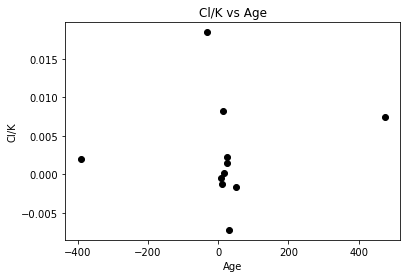

In [476]:
# Crea 'Cl/K vs Age'
plt.scatter(results_data['Age'],results_data['Cl/K'],marker= 'o', color = 'black' )
plt.title('Cl/K vs Age')
plt.xlabel('Age')
plt.ylabel('Cl/K')

Text(0, 0.5, 'Ca/K')

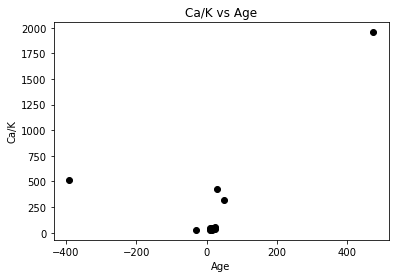

In [477]:
# Crea 'Ca/K vs Age'
plt.scatter(results_data['Age'],results_data['Ca/K'],marker= 'o', color = 'black' )
plt.title('Ca/K vs Age')
plt.xlabel('Age')
plt.ylabel('Ca/K')

Text(0, 0.5, 'Cl/K')

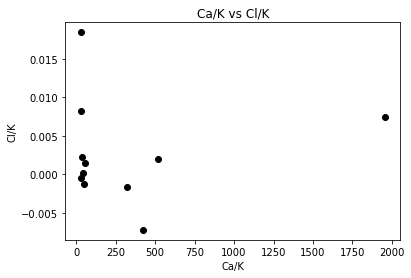

In [478]:
# Crea 'Ca/K vs Cl/K'
plt.scatter(results_data['Ca/K'],results_data['Cl/K'],marker= 'o', color = 'black' )
plt.title('Ca/K vs Cl/K')
plt.xlabel('Ca/K')
plt.ylabel('Cl/K')

Text(0, 0.5, '36Ar/39Ar')

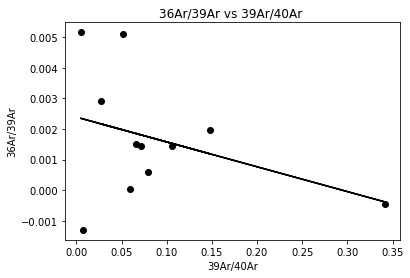

In [479]:
# Crea Isocrona '36Ar/39Ar vs 39Ar/40Ar'
x = results_data['39/40'].dropna()
y = results_data['36/40'].dropna()

plt.plot(x, y, 'o',color = 'black'),

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b,color = 'black')
plt.title('36Ar/39Ar vs 39Ar/40Ar ')
plt.xlabel('39Ar/40Ar')
plt.ylabel('36Ar/39Ar')


In [480]:
x_intercept = -b/m
print ('x_intercept =',x_intercept )
print ('y_intercept =',b)
print ('slope =',m)

x_intercept = 0.2943120636187397
y_intercept = 0.0023877481890784004
slope = -0.008112981030133913


Crea Spectrum Age plot 

In [481]:
# Crea la cumulata dei valori nella colonna '% 39Ar' del dataframe results data
cumulative = results_data['% 39Ar'].cumsum()
cumulative_df = pd.DataFrame(cumulative)

# Crea dataframe Age+2error
age_più_2error_df = pd.DataFrame(results_data['Age+2error'])

# Crea dataframe Age-2error
age_meno_2error_df = pd.DataFrame(results_data['Age-2error'])

# Duplica i valori della cumulata
double_cumulative_df = pd.DataFrame(np.repeat(cumulative_df.values,2,axis=0))
double_cumulative_df.columns = cumulative_df.columns

# Rinomina il database double_cumulative (Cum%39)
double_cumulative_df= double_cumulative_df.rename(columns={"% 39Ar": "Cum%39"})

# Cancella l'ultima riga di (Cum%39)
print(double_cumulative_df.index[-1])
double_cumulative_df=pd.DataFrame(double_cumulative_df.drop(index=double_cumulative_df.index[-1]))

# Aggiungi "O" alla prima riga di (Cum%39)
double_cumulative_df.loc[-1] = [0]  # adding a row
double_cumulative_df.index = double_cumulative_df.index + 1  # shifting index
double_cumulative_df= double_cumulative_df.sort_index()  # sorting by index

# Duplica i valori di (Age+2error)
double_age_più_2error_df = pd.DataFrame(np.repeat(age_più_2error_df.values,2,axis=0))
double_age_più_2error_df.columns = age_più_2error_df.columns

# Duplica i valori di (Age+2error)
double_age_meno_2error_df = pd.DataFrame(np.repeat(age_meno_2error_df.values,2,axis=0))
double_age_meno_2error_df.columns = age_meno_2error_df.columns

# Unione dei dataframe
double_cumulative_df['Age+2error'] = double_age_più_2error_df['Age+2error']
double_cumulative_df['Age-2error'] = double_age_meno_2error_df['Age-2error']
double_cumulative_df

21


,Cum%39,Age+2error,Age-2error
0,0.000000,-32.056952,-30.579182
1,6.356340,-32.056952,-30.579182
2,6.356340,488.706148,460.867485
3,11.391733,488.706148,460.867485
4,11.391733,-405.448103,-378.623730
5,15.479489,-405.448103,-378.623730
6,15.479489,51.112086,48.401582
7,20.285152,51.112086,48.401582
8,20.285152,24.398971,23.446307
9,24.143179,24.398971,23.446307


Text(0, 0.5, 'Apparent Age (Ma)')

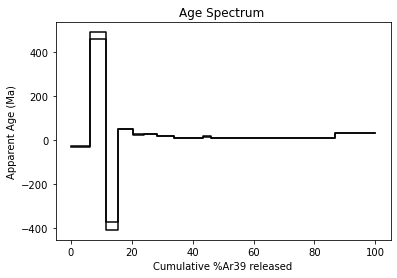

In [392]:
# Spectrum Age
plt.plot(double_cumulative_df ['Cum%39'], double_cumulative_df ['Age+2error'], label = 'Age+2error',color = 'black')
plt.plot(double_cumulative_df ['Cum%39'], double_cumulative_df ['Age-2error'], label = 'Age-2error', color = 'black')
plt.title('Age Spectrum ')
plt.xlabel('Cumulative %Ar39 released')
plt.ylabel('Apparent Age (Ma)')


# PLOT 'gainF/IC0 vs 40Ar F' and 'gainIC0/IC1 vs gainF/IC0'¶

Text(0, 0.5, 'gainF/IC0')

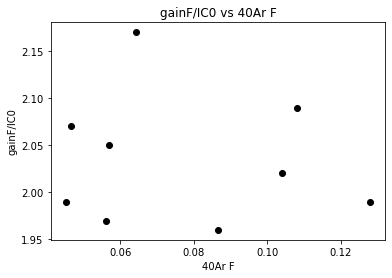

In [132]:
# Crea 'gainF/IC0 vs 40Ar F'
plt.scatter(df_data['40Ar F'],df_data['gainF/IC0'],marker= 'o', color = 'black' )
plt.title('gainF/IC0 vs 40Ar F')
plt.xlabel('40Ar F')
plt.ylabel('gainF/IC0')

Text(0, 0.5, 'gainIC0/IC1')

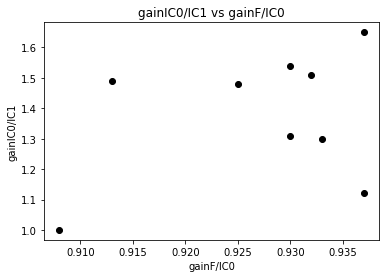

In [268]:
# Crea 'gainIC0/IC1 vs gainF/IC0'
plt.scatter(df_data['gainF/IC0'],df_data['gainIC0/IC1'],marker= 'o', color = 'black' )
plt.title('gainIC0/IC1 vs gainF/IC0')
plt.xlabel('gainF/IC0')
plt.ylabel('gainIC0/IC1')